In [47]:
import numpy as np
import hiive.mdptoolbox as mdptoolbox
import hiive.mdptoolbox.mdp
import hiive.mdptoolbox.example
import matplotlib.pyplot as plt
import seaborn as sns

LEFT = 0
DOWN = 1
RIGHT = 2
UP = 3

MAPS = {
    "4x4": [
        "SFFF",
        "FHFH",
        "FFFH",
        "HFFG"
    ],
    "8x8": [
        "SFFFFFFF",
        "FFFFFFFF",
        "FFFHFFFF",
        "FFFFFHFF",
        "FFFHFFFF",
        "FHHFFFHF",
        "FHFFHFHF",
        "FFFHFFFG"
    ],
}

def plot_matrix(policytoplot, title):

    plt.figure(figsize=(15,15))
    plt.title(title)
    sns.heatmap(policytoplot,cmap="YlGnBu", annot=True, cbar=False)
#     plt.figsize(15, 15)
    plt.show()

def plot_size_vs_rewards(linetoplot, title):
    plt.plot(linetoplot)
    plt.xlabel('Size')
    plt.ylabel('Mean V')
    plt.title(title)
    plt.show

def plot_vi_epsilon(linetoplot, title):
    plt.plot(linetoplot)
    plt.xlabel('Min Epsilon')
    plt.ylabel('Mean V')
    plt.title(title)
    plt.show

def plot_epsilon(linetoplot, title):
    plt.plot(linetoplot)
    plt.xlabel('Alpha')
    plt.ylabel('Mean V')
    plt.title(title)
    plt.show
    
    
def plot_alpha(linetoplot, title):
    plt.plot(linetoplot)
    plt.xlabel('Alpha')
    plt.ylabel('Mean V')
    plt.title(title)
    plt.show

def plot_gamma(linetoplot, title):
    plt.plot(linetoplot)
    plt.xlabel('Gamma')
    plt.ylabel('Mean V')
    plt.title(title)
    plt.show
       
def plot_q_learning_timetaken(stats):
    plt.plot(stats)

    plt.xlabel('Iterations')
    plt.ylabel('Time')
    title = 'Time vs Iterations'
    plt.title(title)
    plt.show()

def plot_q_learning(stats, plotstring, plotstring2):
    policy_rewards = []
    policy_rewards_interval = []
    i = 0
    for s in stats:
        policy_rewards.append(s['Reward'])
        if i % 100 == 0:
            policy_rewards_interval.append(s['Reward'])

    print(min(policy_rewards_interval))
    print(max(policy_rewards_interval))
    plt.plot(policy_rewards)
    # fig = plt.figure()
    # ax = fig.add_subplot(1, 1, 1)
    # ax.plot(y=policy_rewards)
    # fig.canvas.draw()
    # plt.axes.plot(y=policy_rewards)

    plt.xlabel('Iterations')
    plt.ylabel(plotstring2)
    title = plotstring + ' ' + plotstring2 + ' vs Iterations'
    plt.title(title)
    plt.show()

def plot_learning(stats, plotstring, plotstring2):
    policy_rewards = []
    for s in stats:
        policy_rewards.append(s[plotstring2])


    plt.plot(policy_rewards)
    # fig = plt.figure()
    # ax = fig.add_subplot(1, 1, 1)
    # ax.plot(y=policy_rewards)
    # fig.canvas.draw()
    # plt.axes.plot(y=policy_rewards)

    plt.xlabel('Iterations')
    plt.ylabel(plotstring2)
    title = plotstring + ' ' + plotstring2 + ' vs Iterations'
    plt.title(title)
    plt.show()

def plot_mean_v_learning(stats, plotstring, plotstring2):
    policy_rewards = []
    for s in stats:
        policy_rewards.append(s['Mean V'])

    plt.plot(policy_rewards)
    # fig = plt.figure()
    # ax = fig.add_subplot(1, 1, 1)
    # ax.plot(y=policy_rewards)
    # fig.canvas.draw()
    # plt.axes.plot(y=policy_rewards)

    plt.xlabel('Iterations')
    plt.ylabel('V')
    title = plotstring + ' ' + plotstring2 + ' vs Iterations'
    plt.title(title)
    plt.show()

# def plot_q_learning(stats, plotstring, plotstring2):
#     policy_rewards = []
#     policy_rewards_interval = []
#     i = 0
#     for s in stats:
#         policy_rewards.append(s['Reward'])
#         if i % 100 == 0:
#             policy_rewards_interval.append(s['Reward'])

#     print(min(policy_rewards_interval))
#     print(max(policy_rewards_interval))
#     plt.plot(policy_rewards)
#     # fig = plt.figure()
#     # ax = fig.add_subplot(1, 1, 1)
#     # ax.plot(y=policy_rewards)
#     # fig.canvas.draw()
#     # plt.axes.plot(y=policy_rewards)

#     plt.xlabel('Iterations')
#     plt.ylabel('Reward')
#     title = plotstring + ' ' + plotstring2 + ' vs Iterations'
#     plt.title(title)
#     plt.show()

# def plot_learning(stats, plotstring, plotstring2):
#     policy_rewards = []
#     for s in stats:
#         policy_rewards.append(s[plotstring2])


#     plt.plot(policy_rewards)
#     # fig = plt.figure()
#     # ax = fig.add_subplot(1, 1, 1)
#     # ax.plot(y=policy_rewards)
#     # fig.canvas.draw()
#     # plt.axes.plot(y=policy_rewards)

#     plt.xlabel('Iterations')
#     plt.ylabel('Reward')
#     title = plotstring + ' ' + plotstring2 + ' vs Iterations'
#     plt.title(title)
#     plt.show()

# def plot_mean_v_learning(stats, plotstring, plotstring2):
#     policy_rewards = []
#     for s in stats:
#         policy_rewards.append(s['Mean V'])

#     plt.plot(policy_rewards)
#     # fig = plt.figure()
#     # ax = fig.add_subplot(1, 1, 1)
#     # ax.plot(y=policy_rewards)
#     # fig.canvas.draw()
#     # plt.axes.plot(y=policy_rewards)

#     plt.xlabel('Iterations')
#     plt.ylabel('Reward')
#     title = plotstring + ' ' + plotstring2 + ' vs Iterations'
#     plt.title(title)
#     plt.show()

def generate_random_map(size=8, p=0.8):
    """Generates a random valid map (one that has a path from start to goal)
    :param size: size of each side of the grid
    :param p: probability that a tile is frozen
    """
    valid = False

    # DFS to check that it's a valid path.
    def is_valid(res):
        frontier, discovered = [], set()
        frontier.append((0, 0))
        while frontier:
            r, c = frontier.pop()
            if not (r, c) in discovered:
                discovered.add((r, c))
                directions = [(1, 0), (0, 1), (-1, 0), (0, -1)]
                for x, y in directions:
                    r_new = r + x
                    c_new = c + y
                    if r_new < 0 or r_new >= size or c_new < 0 or c_new >= size:
                        continue
                    if res[r_new][c_new] == 'G':
                        return True
                    if (res[r_new][c_new] != 'H'):
                        frontier.append((r_new, c_new))
        return False

    while not valid:
        p = min(1, p)
        res = np.random.choice(['F', 'H'], (size, size), p=[p, 1-p])
        res[0][0] = 'S'
        res[-1][-1] = 'G'
        valid = is_valid(res)
    return ["".join(x) for x in res]

desc = MAPS["8x8"]
# desc = generate_random_map(25, .8)
print(*desc, sep='\n')
# print(desc[0][0])
# frozenworld = []
# for i in range(25):
#     temp = []
#     for j in range(25):
#         temp.append(desc[i][j])
#     frozenworld.append(temp)
# # frozenworld = [[desc for i in range(25)] for j in range(25)]
# # print(frozenworld[0][0])
# frozenworld = np.asarray(frozenworld, dtype='c').astype(np.int)
# plot_matrix(frozenworld, 'Frozen Lake 25x25')
desc = np.asarray(desc, dtype='c')
# plot_matrix(desc, 'Frozen Lake 25x25')
nrow, ncol = nrow, ncol = desc.shape
reward_range = (0, 1)

nA = 4
nS = nrow * ncol

isd = np.array(desc == b'S').astype('float64').ravel()
isd /= isd.sum()

P = {s: {a: [] for a in range(nA)} for s in range(nS)}
is_slippery = True
def to_s(row, col):
    return row*ncol + col

def inc(row, col, a):
    if a == LEFT:
        col = max(col - 1, 0)
    elif a == DOWN:
        row = min(row + 1, nrow - 1)
    elif a == RIGHT:
        col = min(col + 1, ncol - 1)
    elif a == UP:
        row = max(row - 1, 0)
    return (row, col)

def update_probability_matrix(row, col, action):
    newrow, newcol = inc(row, col, action)
    newstate = to_s(newrow, newcol)
    newletter = desc[newrow, newcol]
    done = bytes(newletter) in b'GH'
    reward = float(newletter == b'G')
    if newletter == b'G':
        reward = 1000.
    elif newletter == b'H':
        reward = -1000. #float(newletter == b'H')
    else:
        reward = -10.
    return newstate, reward, done

rewards = np.zeros((nS, nA))
temp_rewards = []
rewards_vec = []
all_rewards = []
all_temp_rewards = []#np.zeros(16, 12)
count = 0
R3 = np.zeros((nS, nA))
transition_matrix = np.zeros((nA, nS, nS))
transition_matrix2 = np.zeros((nS, nA, nS))
for row in range(nrow):
    for col in range(ncol):
        s = to_s(row, col)
        temp_rewards = []
        all_rewards = []
        count = 0
        for a in range(4):
            # temp_rewards = []
            li = P[s][a]
            letter = desc[row, col]
            if letter in b'GH':
                li.append((1.0, s, 0, True))
                rewards[row * ncol + col][a] += li[0][2]
                transition_matrix[a][row * ncol + col][li[0][1]] += li[0][0]
            else:
                if is_slippery:
                    rewards_vec = []
                    count = 0
                    for b in [(a - 1) % 4, a, (a + 1) % 4]:
                        if b == a:
                            prob = 1./2.
                        else:
                            prob = 1. / 4.

                        #all_temp_rewards[row * col][count]
                        li.append((
                            1. / 3.,
                            *update_probability_matrix(row, col, b)
                        ))
                        # all_rewards.append(li[0][2])
                        rewards[row*ncol + col][b] += li[count][2]
                        transition_matrix2[row*ncol + col][a][li[count][1]] += li[count][0]
                        transition_matrix[b][row*ncol + col][li[count][1]] += li[count][0]
                        count += 1
                else:
                    li.append((
                        1., *update_probability_matrix(row, col, a)
                    ))
                    


SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG


Frozen Lake QLearning Gamma exploration
epsilon:  0.1
-3000.0
3000.0


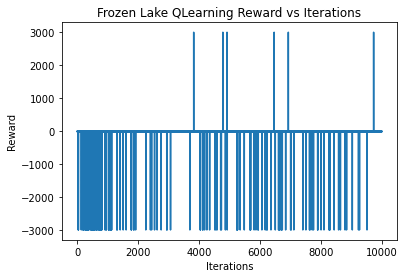

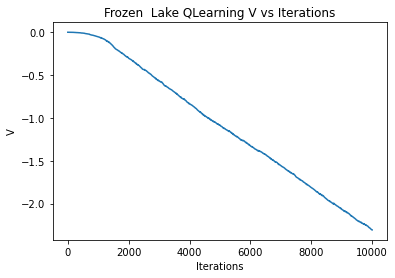

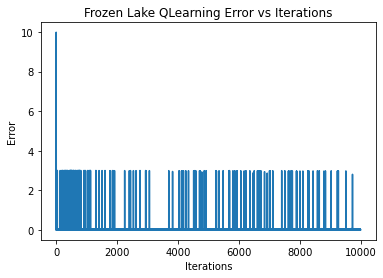

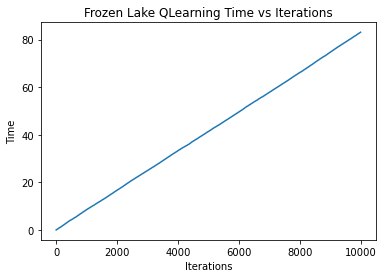

epsilon:  0.1
-3000.0
3000.0


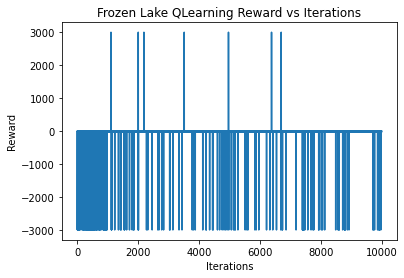

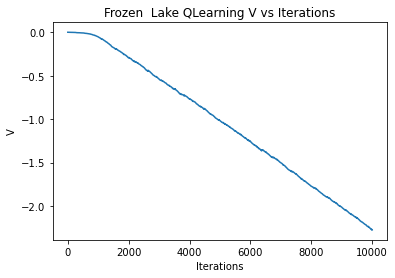

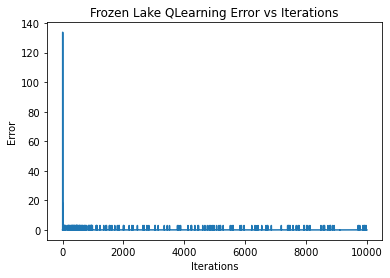

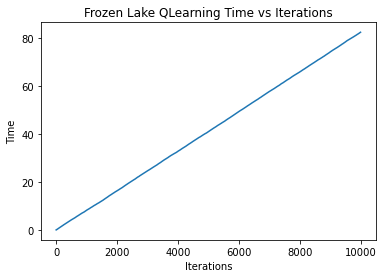

epsilon:  0.1
-3000.0
3000.0


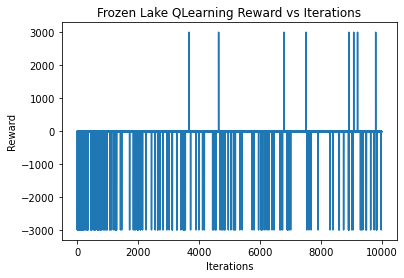

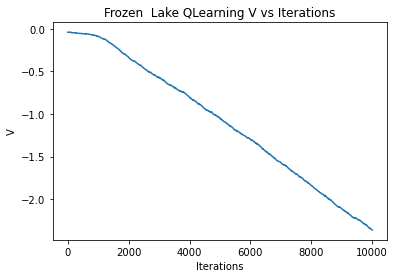

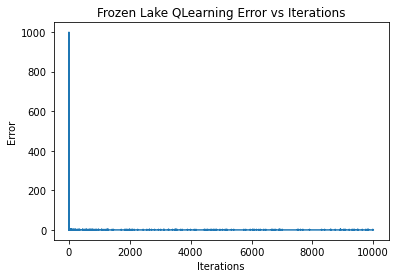

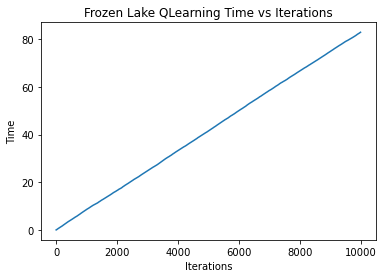

epsilon:  0.1
-3000.0
3000.0


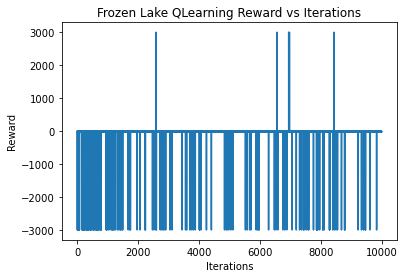

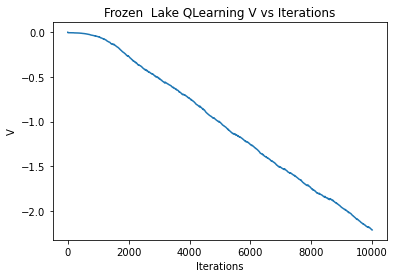

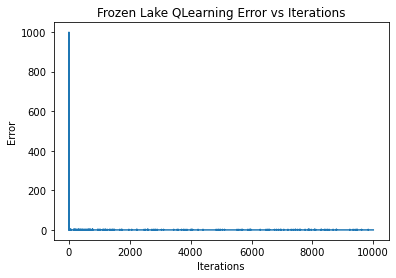

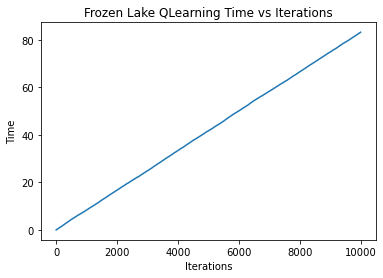

epsilon:  0.1
-3000.0
3000.0


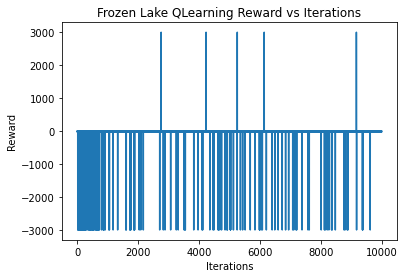

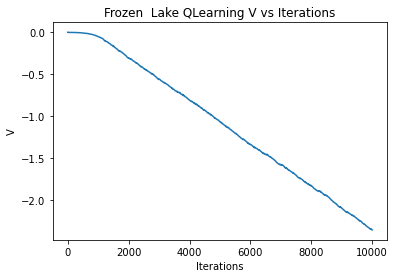

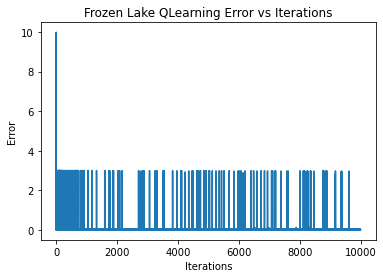

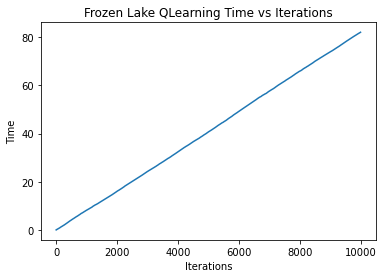

epsilon:  0.1
-3000.0
3000.0


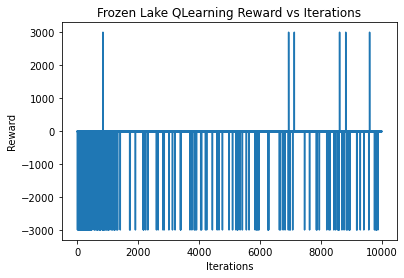

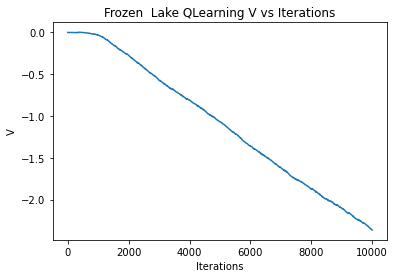

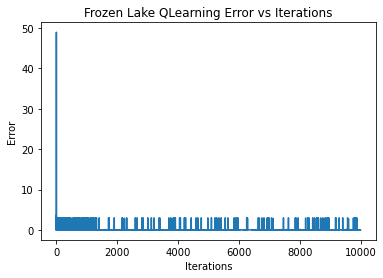

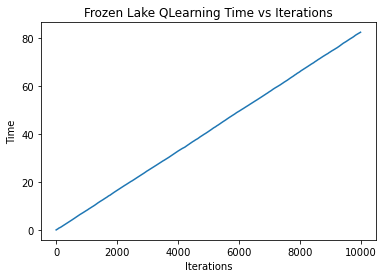

epsilon:  0.1
-3000.0
3000.0


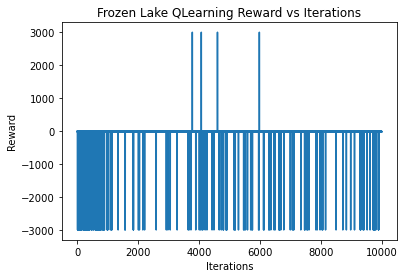

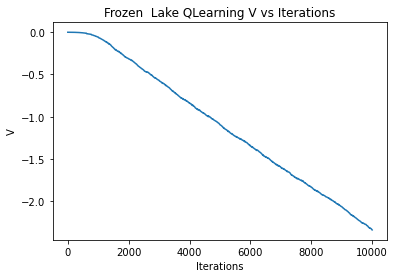

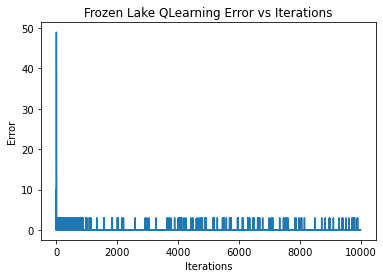

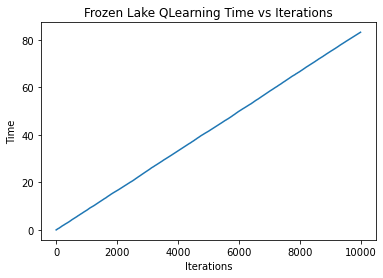

epsilon:  0.1
-3000.0
3000.0


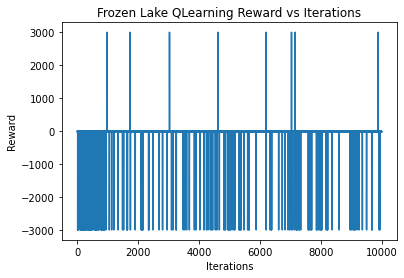

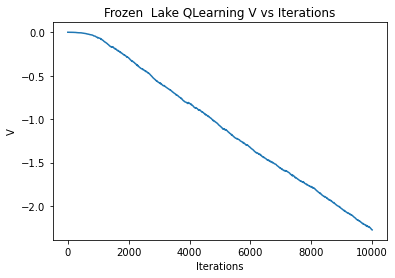

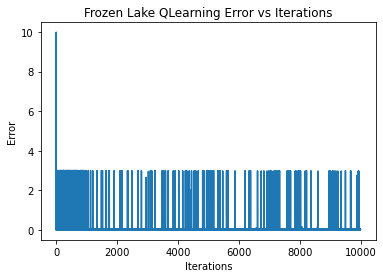

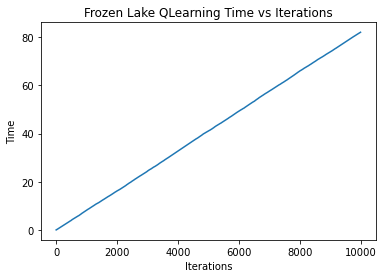

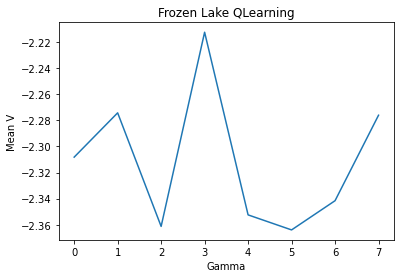

In [3]:
size = [.6, .7, .8, .9, .99, .999, .9999, .99999]
print('Frozen Lake QLearning Gamma exploration')
# iters_list = [40000000, 20000000, 10000000, 5000000, 1000000]
# time_taken = []
rewards_qlearning = []
for s in size:
    q_learning = mdptoolbox.mdp.QLearning(transitions=transition_matrix, reward=rewards,
                                          gamma=s, n_iter=500000, alpha=.9#, alpha_decay=.99, epsilon_decay=.9999999# alpha=.6, alpha_decay=.1
                                          #,
                                          # epsilon=.1, alpha=.2,
                                          # epsilon_decay=.1, alpha_decay=.1,
                                          # epsilon_min=.01
                                          )
    q_learning_stats = q_learning.run()
    plot_q_learning(q_learning_stats, 'Frozen Lake QLearning', 'Reward')
    plot_mean_v_learning(q_learning_stats, 'Frozen  Lake QLearning', 'V')
    plot_learning(q_learning_stats, 'Frozen Lake QLearning', 'Error')
    plot_learning(q_learning_stats, 'Frozen Lake QLearning', 'Time')
    rewards_qlearning.append(q_learning_stats[-1]['Mean V'])
#     time_taken.append(q_learning.time)
# plot_q_learning_timetaken(time_taken)
plot_gamma(rewards_qlearning, 'Frozen Lake QLearning')

Frozen Lake QLearning Alpha Decay exploration
epsilon:  0.1
-3000.0
3000.0


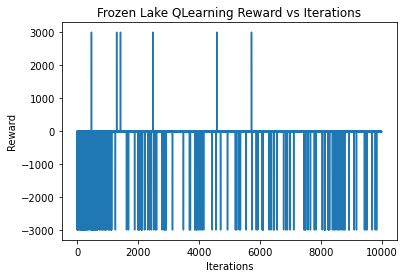

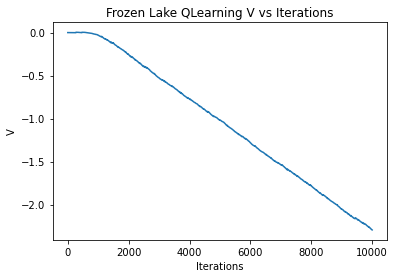

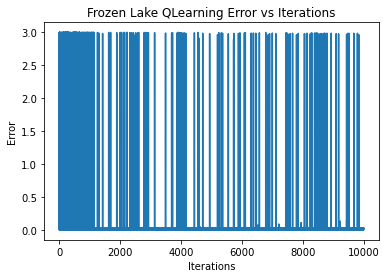

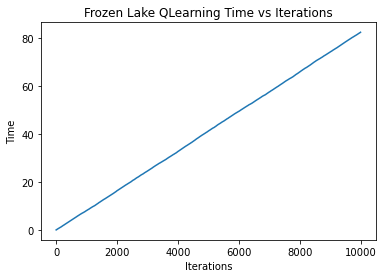

epsilon:  0.1
-3000.0
3000.0


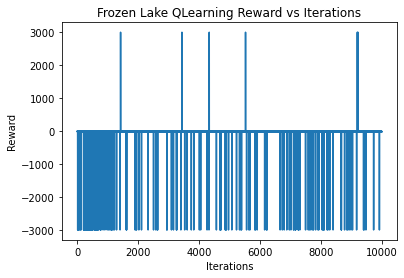

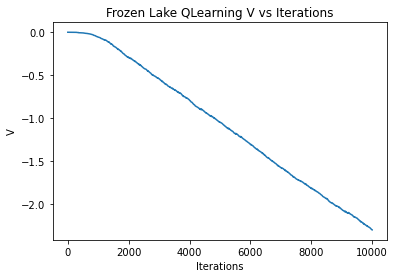

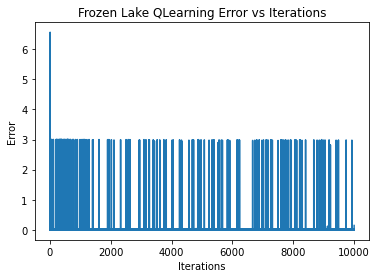

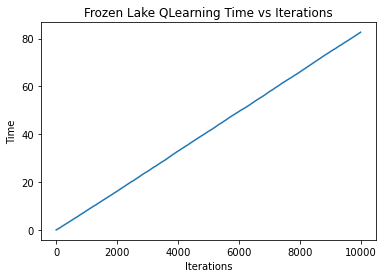

epsilon:  0.1
-3000.0
3000.0


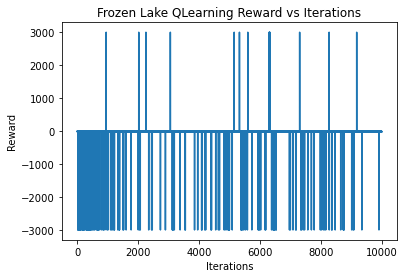

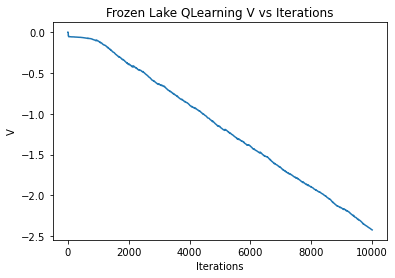

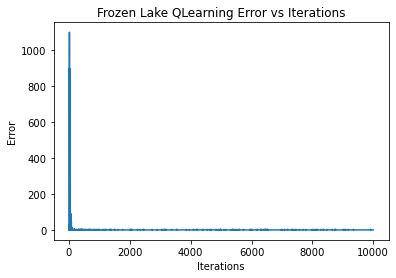

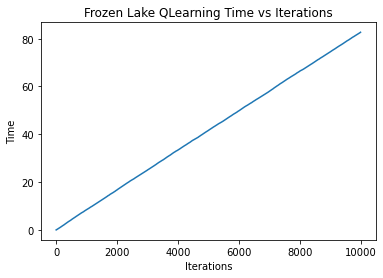

epsilon:  0.1
-3000.0
3000.0


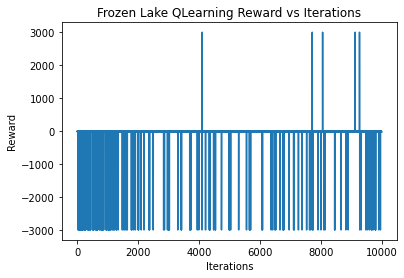

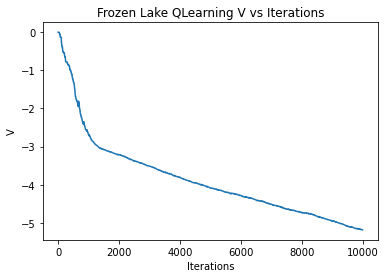

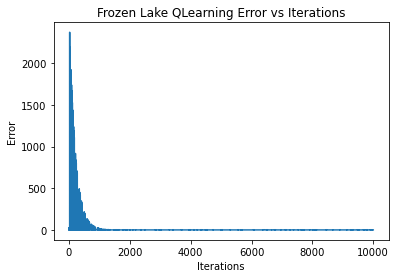

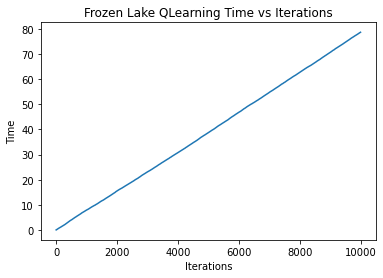

epsilon:  0.1
-3000.0
3000.0


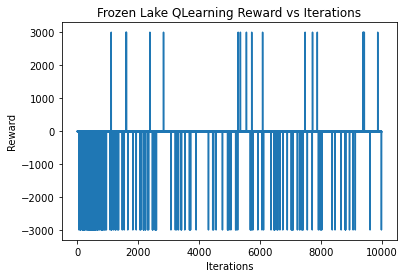

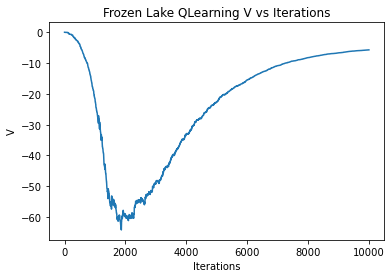

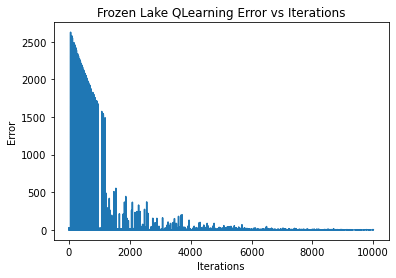

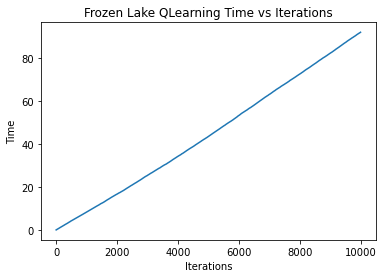

epsilon:  0.1
-3000.0
3000.0


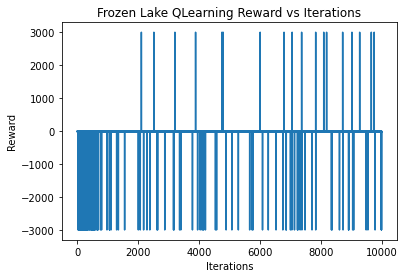

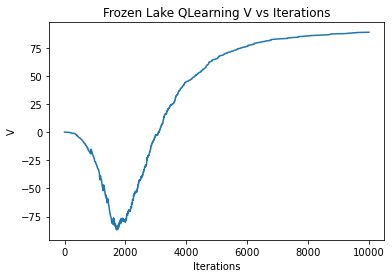

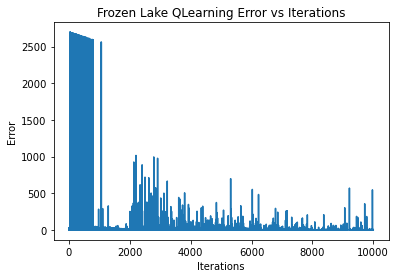

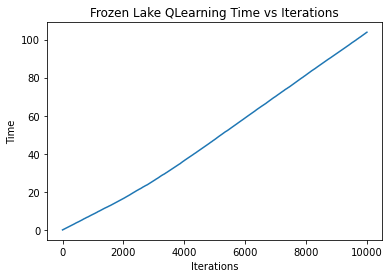

epsilon:  0.1
-3000.0
3000.0


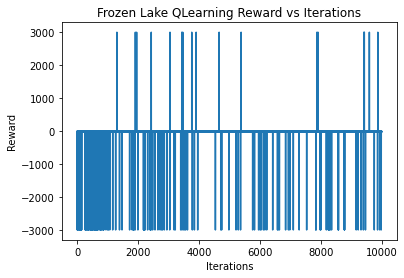

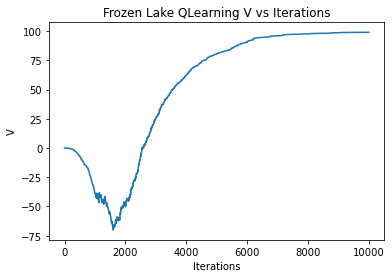

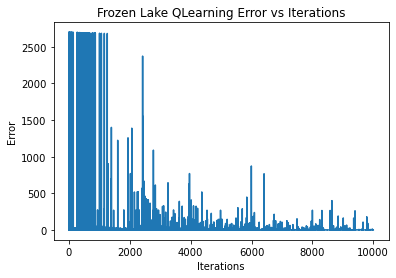

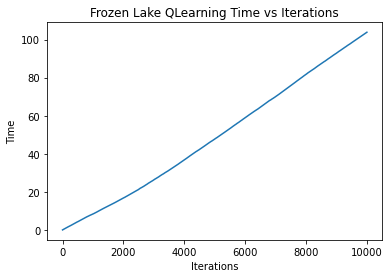

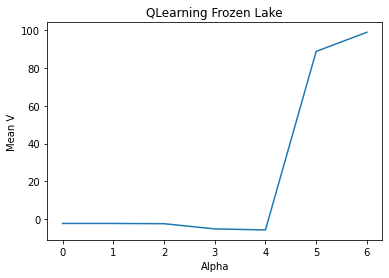

In [4]:
size = [.9, .99, .999, .9999, .99999, .999999, .9999999]
print('Frozen Lake QLearning Alpha Decay exploration')
# iters_list = [40000000, 20000000, 10000000, 5000000, 1000000]
# time_taken = []
rewards_qlearning = []
for s in size:
    q_learning = mdptoolbox.mdp.QLearning(transitions=transition_matrix, reward=rewards,
                                          gamma=.9, n_iter=500000, alpha=.9, alpha_decay=s#, epsilon_decay=.9999999# alpha=.6, alpha_decay=.1
                                          #,
                                          # epsilon=.1, alpha=.2,
                                          # epsilon_decay=.1, alpha_decay=.1,
                                          # epsilon_min=.01
                                          )
    q_learning_stats = q_learning.run()
    plot_q_learning(q_learning_stats, 'Frozen Lake QLearning', 'Reward')
    plot_mean_v_learning(q_learning_stats, 'Frozen Lake QLearning', 'V')
    plot_learning(q_learning_stats, 'Frozen Lake QLearning', 'Error')
    plot_learning(q_learning_stats, 'Frozen Lake QLearning', 'Time')
    rewards_qlearning.append(q_learning_stats[-1]['Mean V'])
#     time_taken.append(q_learning.time)
# plot_q_learning_timetaken(time_taken)
plot_alpha(rewards_qlearning, 'QLearning Frozen Lake')

Frozen Lake QLearning Alpha Decay exploration
epsilon:  0.1
-3000.0
3000.0


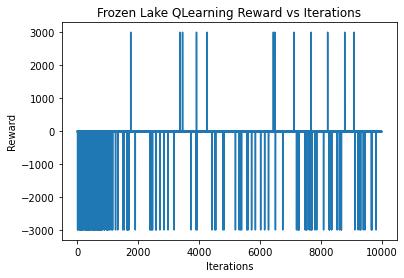

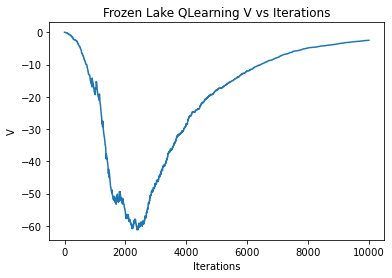

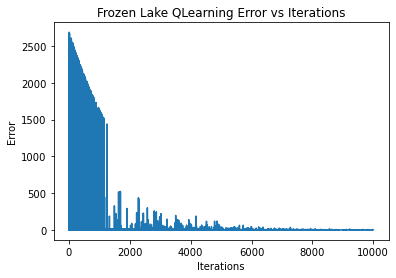

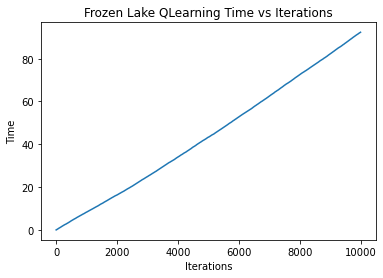

epsilon:  0.1
-3000.0
3000.0


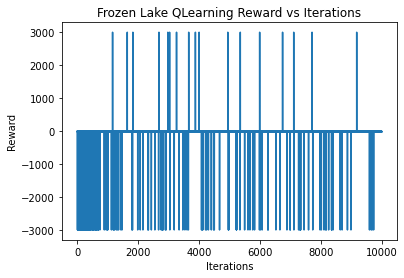

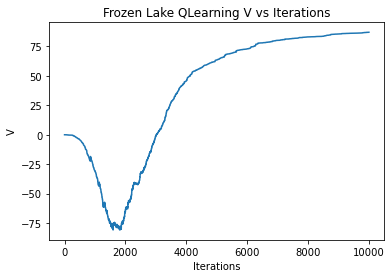

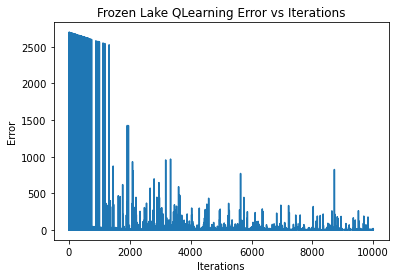

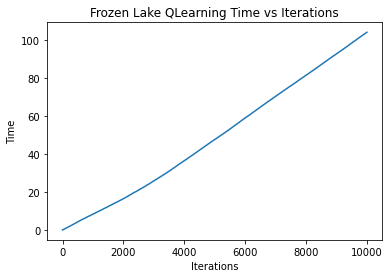

epsilon:  0.1
-3000.0
3000.0


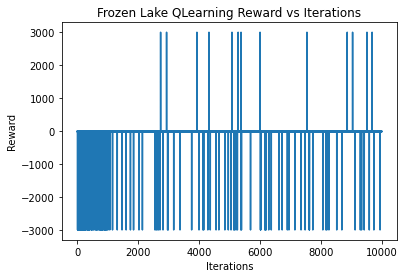

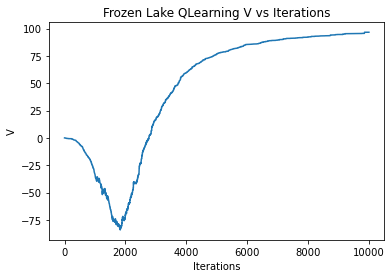

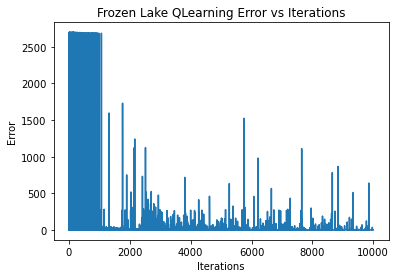

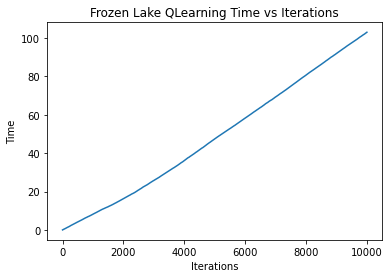

epsilon:  0.1
-3000.0
3000.0


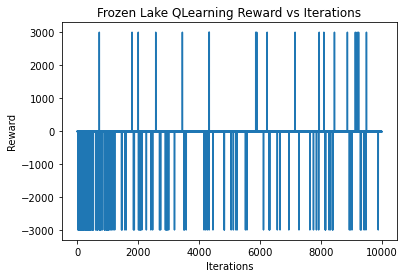

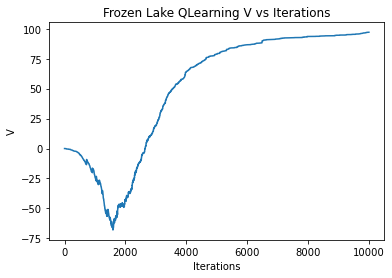

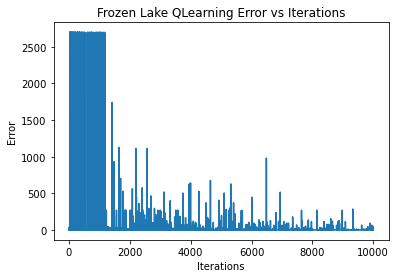

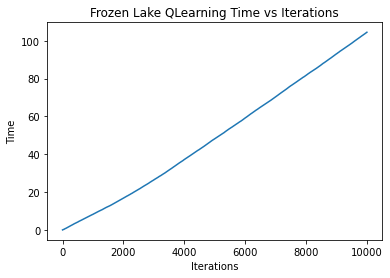

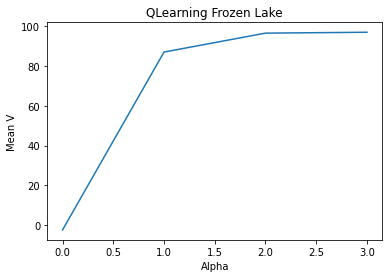

In [5]:
size = [.99999, .999999, .9999999, .99999999]
print('Frozen Lake QLearning Alpha Decay exploration')
# iters_list = [40000000, 20000000, 10000000, 5000000, 1000000]
# time_taken = []
rewards_qlearning = []
for s in size:
    q_learning = mdptoolbox.mdp.QLearning(transitions=transition_matrix, reward=rewards,
                                          gamma=.9, n_iter=500000, alpha=.9, alpha_decay=s#, epsilon_decay=.9999999# alpha=.6, alpha_decay=.1
                                          #,
                                          # epsilon=.1, alpha=.2,
                                          # epsilon_decay=.1, alpha_decay=.1,
                                          # epsilon_min=.01
                                          )
    q_learning_stats = q_learning.run()
    plot_q_learning(q_learning_stats, 'Frozen Lake QLearning', 'Reward')
    plot_mean_v_learning(q_learning_stats, 'Frozen Lake QLearning', 'V')
    plot_learning(q_learning_stats, 'Frozen Lake QLearning', 'Error')
    plot_learning(q_learning_stats, 'Frozen Lake QLearning', 'Time')
    rewards_qlearning.append(q_learning_stats[-1]['Mean V'])
#     time_taken.append(q_learning.time)
# plot_q_learning_timetaken(time_taken)
plot_alpha(rewards_qlearning, 'QLearning Frozen Lake')

Frozen Lake QLearning Epsilon Decay exploration
epsilon:  0.1


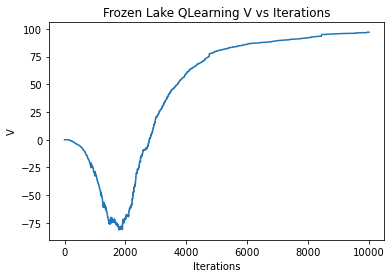

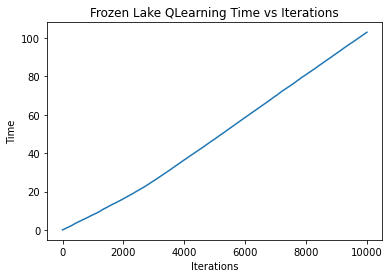

epsilon:  0.1


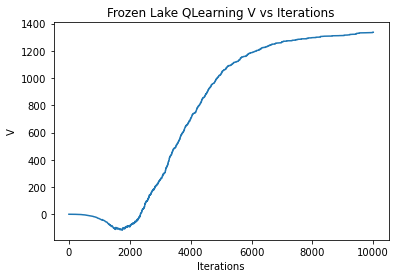

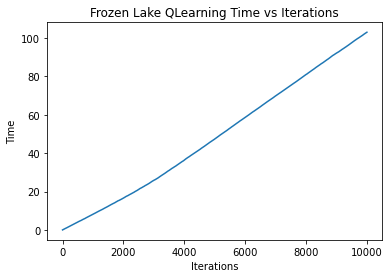

epsilon:  0.1


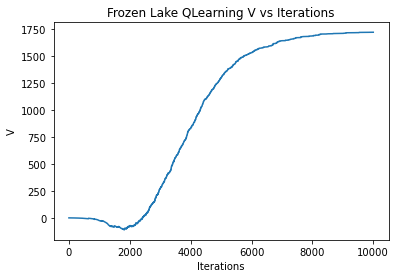

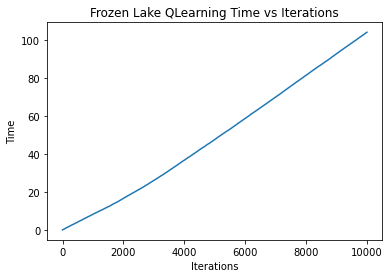

epsilon:  0.1


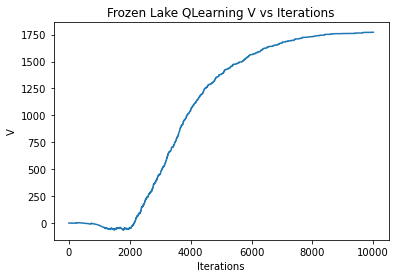

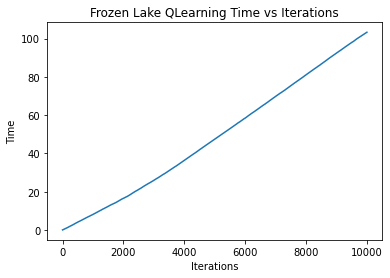

epsilon:  0.1


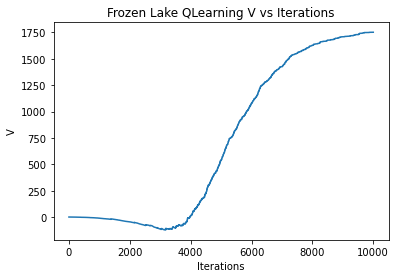

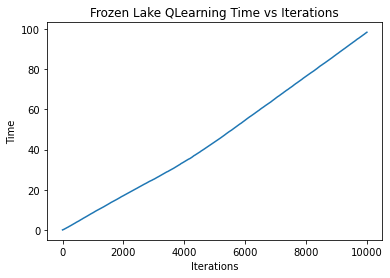

epsilon:  0.6065305080711497


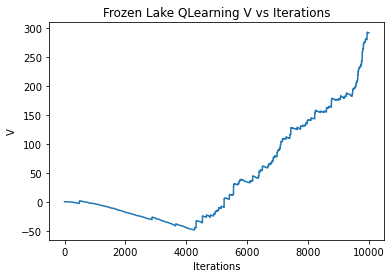

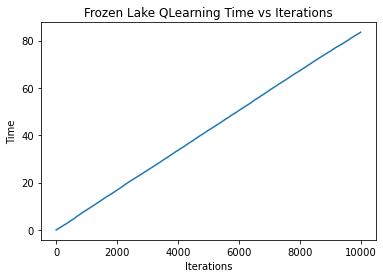

epsilon:  0.9512294221477116


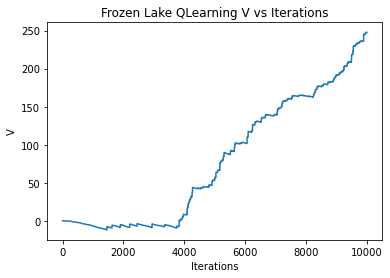

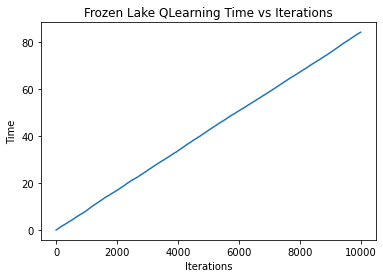

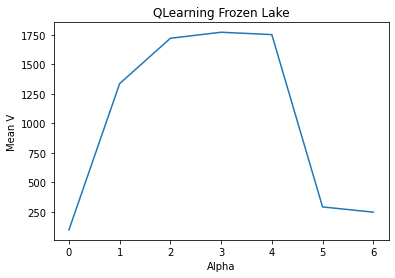

In [6]:
size = [.9, .99, .999, .9999, .99999, .999999, .9999999]
print('Frozen Lake QLearning Epsilon Decay exploration')
# iters_list = [40000000, 20000000, 10000000, 5000000, 1000000]
# time_taken = []
rewards_qlearning = []
for s in size:
    q_learning = mdptoolbox.mdp.QLearning(transitions=transition_matrix, reward=rewards,
                                          gamma=s, n_iter=500000, alpha=.9, alpha_decay=.9999999,
                                          epsilon_decay=s)
    q_learning_stats = q_learning.run()
    plot_mean_v_learning(q_learning_stats, 'Frozen Lake QLearning', 'V')
    plot_learning(q_learning_stats, 'Frozen Lake QLearning', 'Time')
    rewards_qlearning.append(q_learning_stats[-1]['Mean V'])
#     time_taken.append(q_learning.time)
# plot_q_learning_timetaken(time_taken)
plot_epsilon(rewards_qlearning, 'QLearning Frozen Lake')

QLearning Frozen Lake
epsilon:  0.1
-3000.0
3000.0


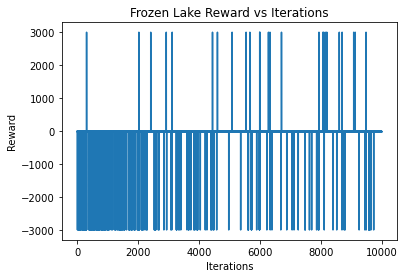

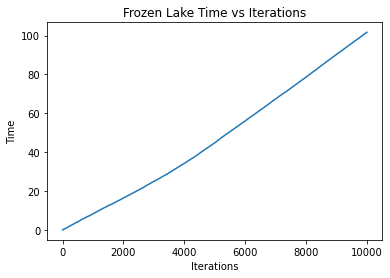

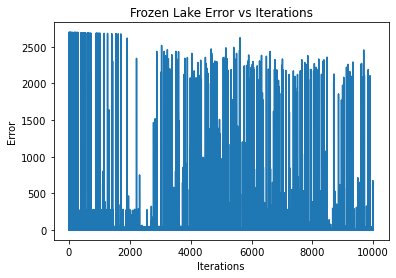

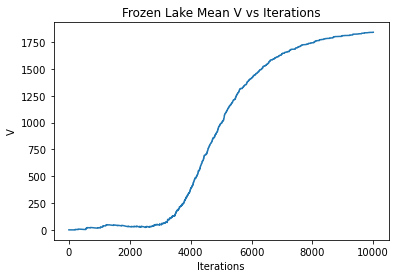

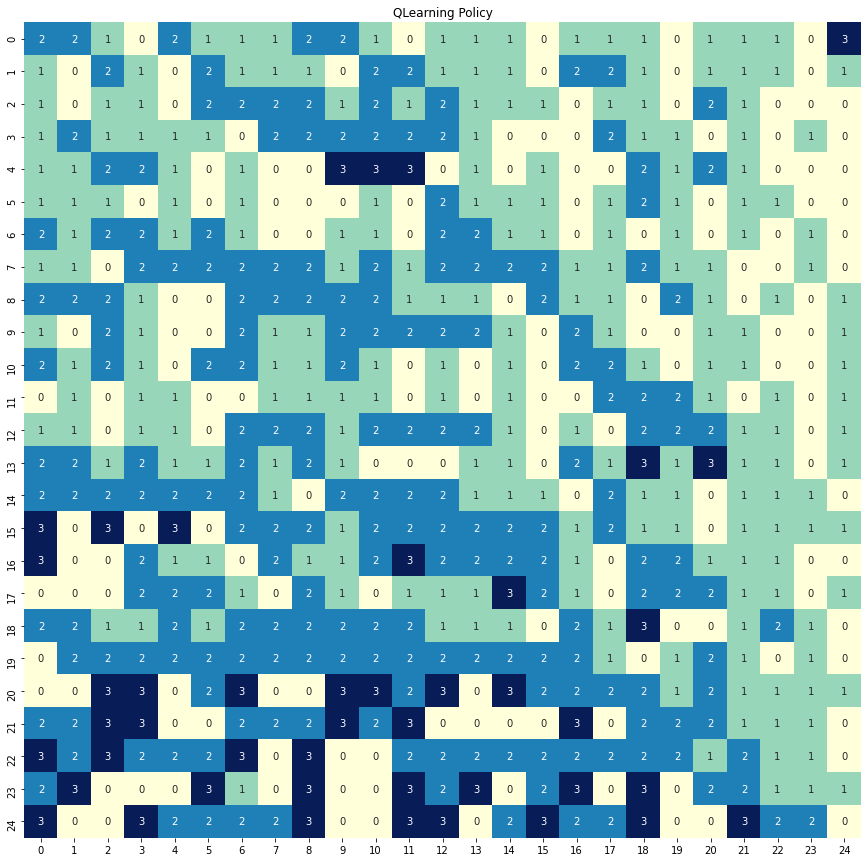

In [46]:
print("QLearning Frozen Lake")
q_learning = mdptoolbox.mdp.QLearning(transitions=transition_matrix, reward=rewards,
                                          gamma=.9999, n_iter=500000, alpha=.9, alpha_decay=.9999999,
                                          epsilon_decay=.99999)
q_learning_stats = q_learning.run()
plot_q_learning(q_learning_stats, 'Frozen Lake', 'Reward')
plot_learning(q_learning_stats, 'Frozen Lake', 'Time')
plot_learning(q_learning_stats, 'Frozen Lake', 'Error')
plot_mean_v_learning(q_learning_stats, 'Frozen Lake', 'Mean V')
plot_matrix(np.array(q_learning.policy).reshape(25, 25), 'QLearning Policy')

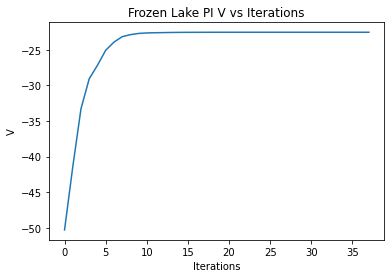

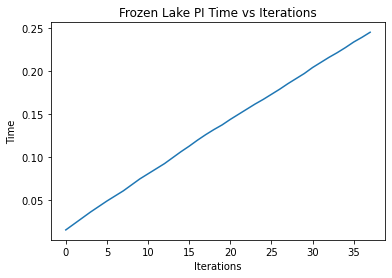

----------------------------------------




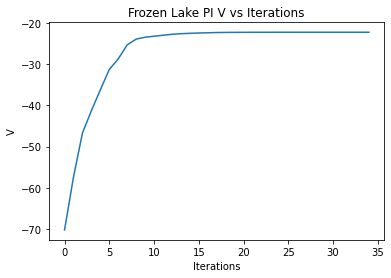

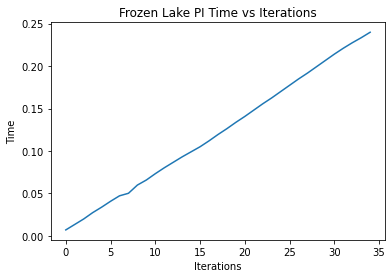

----------------------------------------




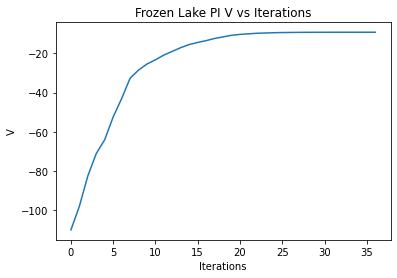

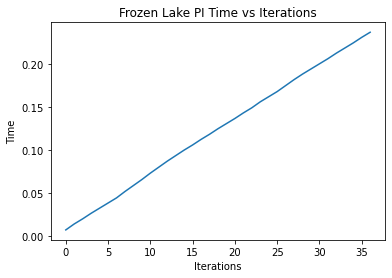

----------------------------------------




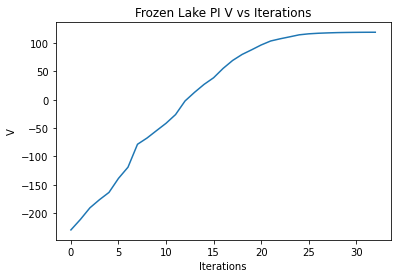

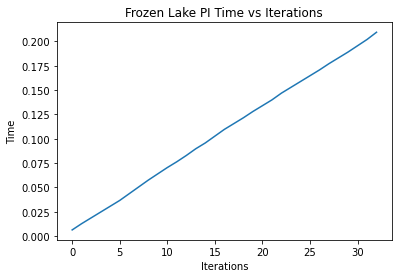

----------------------------------------




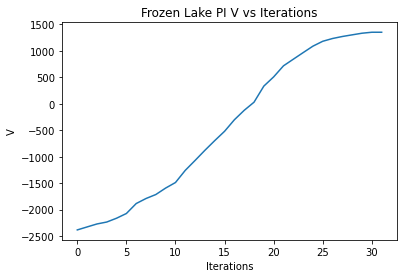

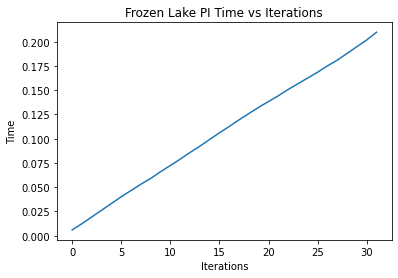

----------------------------------------




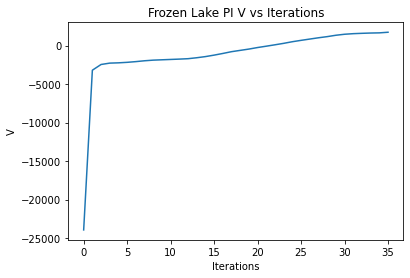

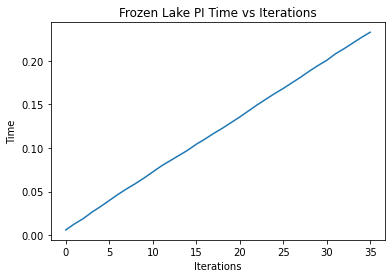

----------------------------------------




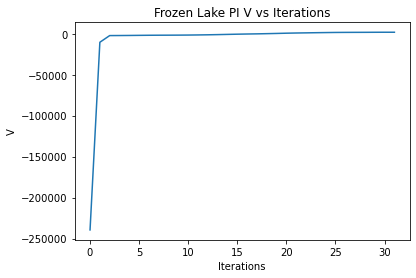

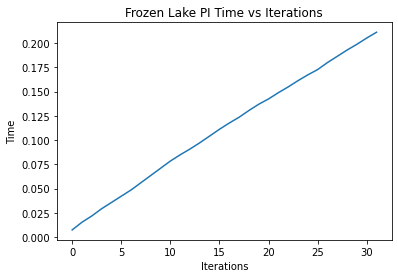

----------------------------------------




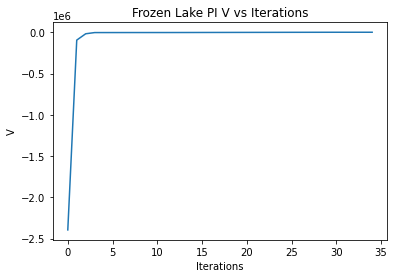

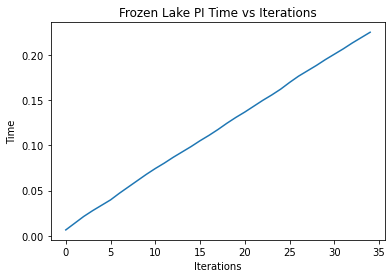

----------------------------------------




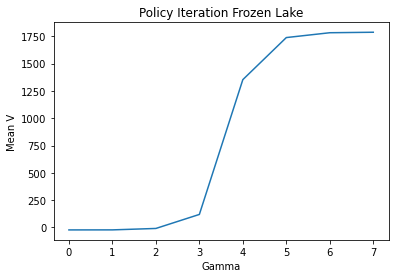

In [11]:
size = [.6, .7, .8, .9, .99, .999, .9999, .99999]
rewards_pi = []
for s in size:
    policy_iteration_forest = mdptoolbox.mdp.PolicyIteration(transitions=transition_matrix,
                                        reward=rewards,
                                        gamma=s)
    policy_iteration_forest_stats = policy_iteration_forest.run()
    policy_iteration_forest_policy = np.array(policy_iteration_forest.policy)#.reshape(nrow, ncol)

#     time_taken.append(q_learning.time)
#     plot_q_learning_timetaken(time_taken)
#     plot_learning(policy_iteration_forest_stats, 'Forest PI', 'Reward')
    # plot_q_learning(q_learning_forest_stats, 'Forest QLearning', 'Reward')
    # print(q_learning_stats[0]['Reward'])
    # print(q_learning_stats[9500]['Reward'])

#     plot_learning(policy_iteration_forest_stats, 'Forest PI', 'Policy Difference')

    plot_mean_v_learning(policy_iteration_forest_stats, 'Frozen Lake PI','V')
    # plot_mean_v_learning(q_learning_forest_stats, 'Forest QLearning', 'V')

#     plot_learning(policy_iteration_forest_stats, 'Forest PI', 'Error')
    # plot_learning(q_learning_forest_stats, 'Forest QLearning', 'Error')

    plot_learning(policy_iteration_forest_stats, 'Frozen Lake PI', 'Time')
    rewards_pi.append(policy_iteration_forest_stats[-1]['Mean V'])
    # plot_learning(q_learning_forest_stats, 'Forest QLearning', 'Time')

    print("----------------------------------------")
    print()
    print()
    
plot_gamma(rewards_pi, 'Policy Iteration Frozen Lake')

PI Frozen Lake


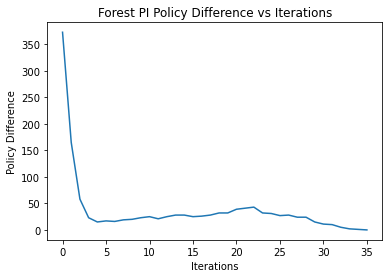

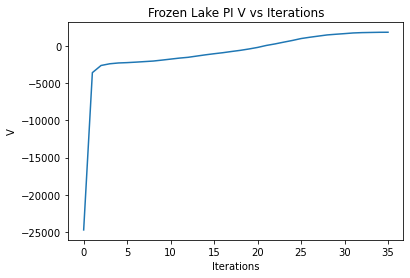

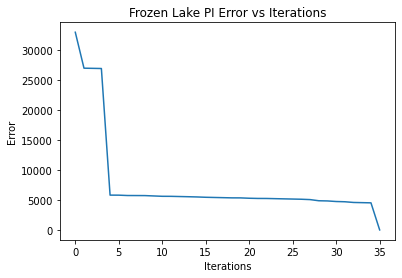

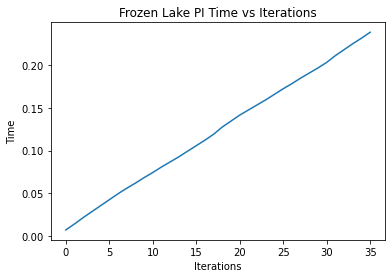

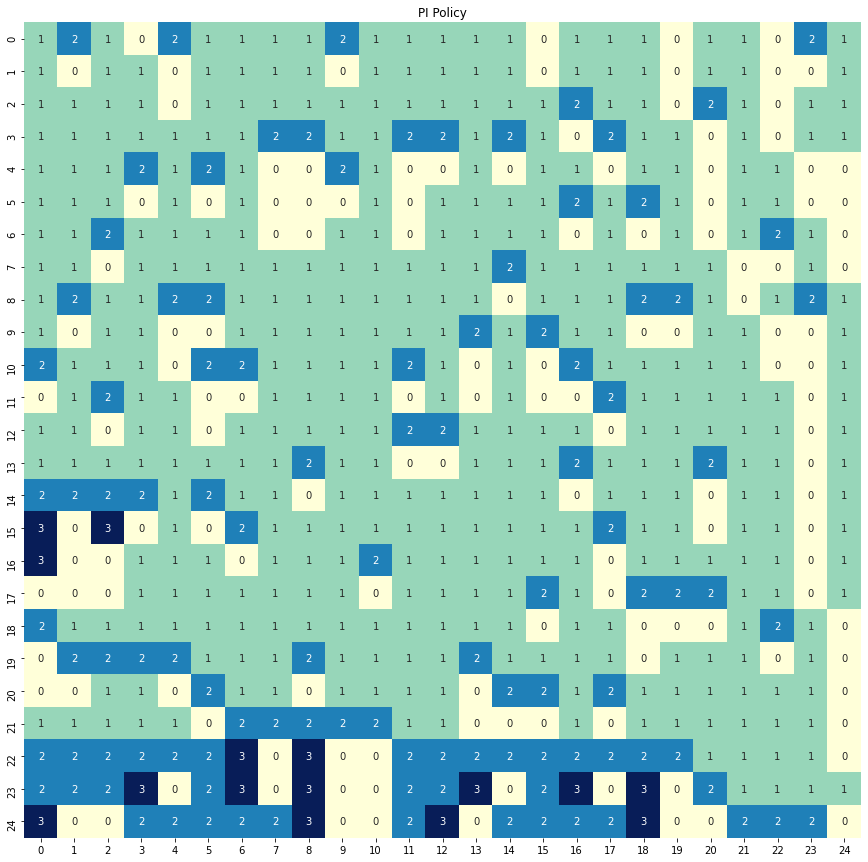

In [35]:
print("PI Frozen Lake")
policy_iteration_forest = mdptoolbox.mdp.PolicyIteration(transitions=transition_matrix,
                                    reward=rewards,
                                    gamma=.999)
policy_iteration_forest_stats = policy_iteration_forest.run()
policy_iteration_forest_policy = np.array(policy_iteration_forest.policy)#.reshape(nrow, ncol)


plot_learning(policy_iteration_forest_stats, 'Forest PI', 'Policy Difference')
plot_mean_v_learning(policy_iteration_forest_stats, 'Frozen Lake PI','V')
plot_learning(policy_iteration_forest_stats, 'Frozen Lake PI', 'Error')
plot_learning(policy_iteration_forest_stats, 'Frozen Lake PI', 'Time')


plot_matrix(np.array(policy_iteration_forest.policy).reshape(25, 25), 'PI Policy')

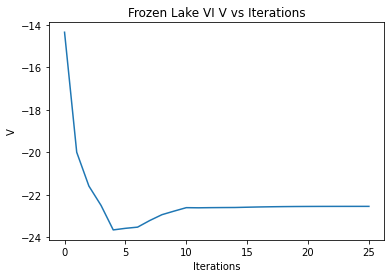

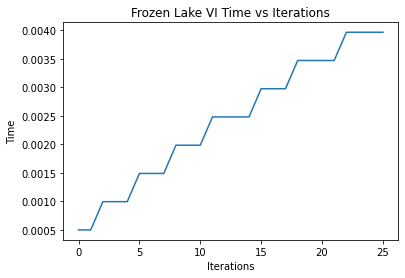

----------------------------------------




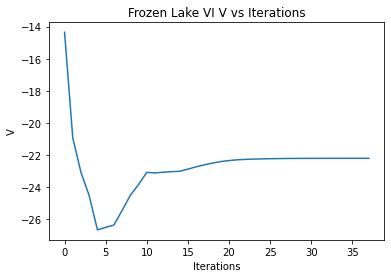

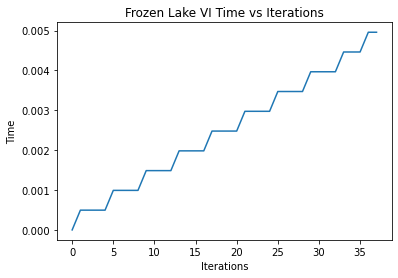

----------------------------------------




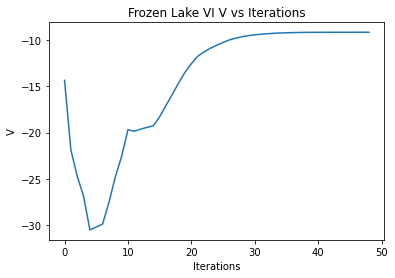

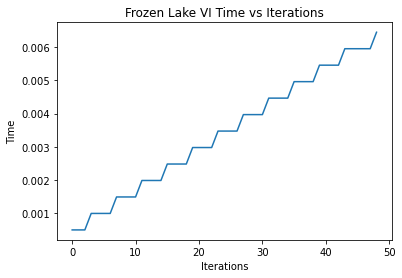

----------------------------------------




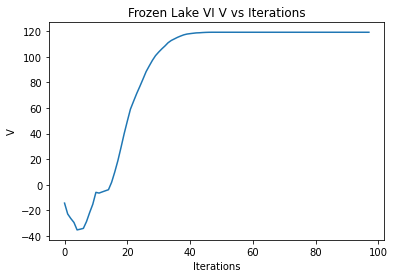

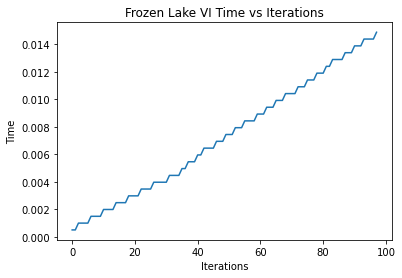

----------------------------------------




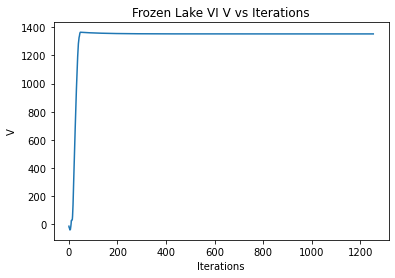

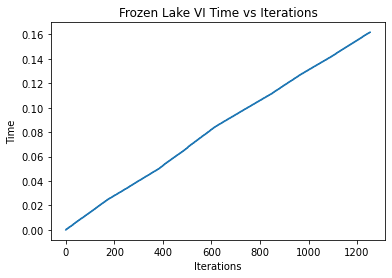

----------------------------------------




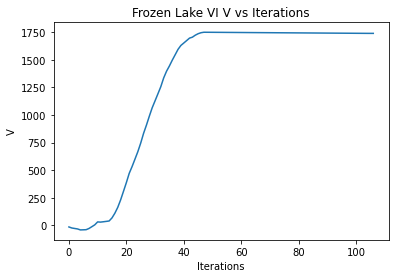

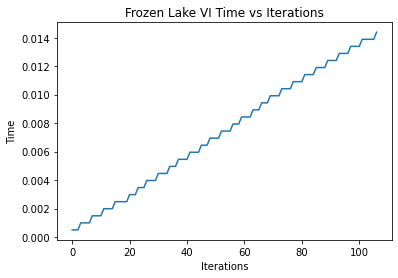

----------------------------------------




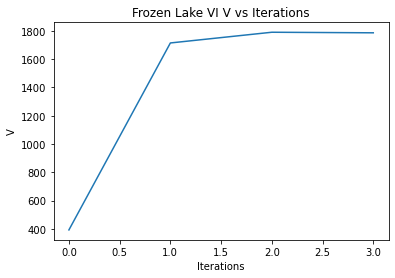

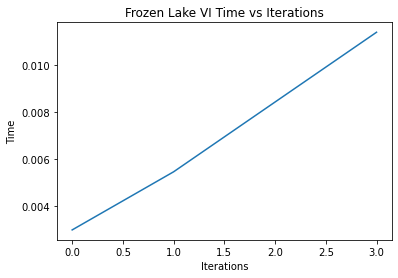

----------------------------------------




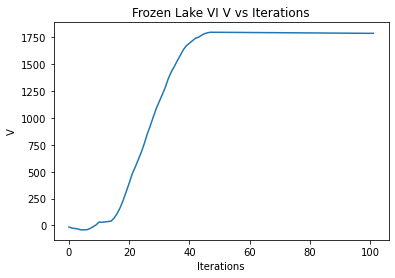

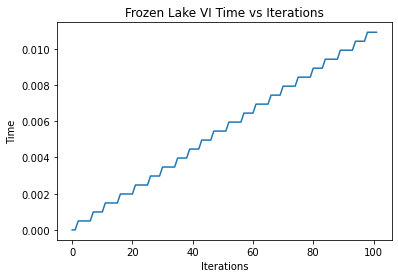

----------------------------------------




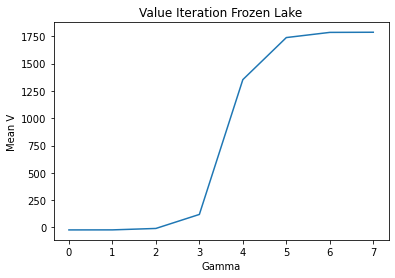

In [13]:
size = [.6, .7, .8, .9, .99, .999, .9999, .99999]
rewards_vi = []
for s in size:
    value_iteration_forest = mdptoolbox.mdp.ValueIteration(transitions=transition_matrix,
                                        reward=rewards,
                                        gamma=s)
    value_iteration_forest_stats = value_iteration_forest.run()
    value_iteration_forest_policy = np.array(value_iteration_forest.policy)#.reshape(nrow, ncol)

#     plot_learning(policy_iteration_forest_stats, 'Forest PI', 'Policy Difference')

    plot_mean_v_learning(value_iteration_forest_stats, 'Frozen Lake VI','V')
    # plot_mean_v_learning(q_learning_forest_stats, 'Forest QLearning', 'V')

#     plot_learning(policy_iteration_forest_stats, 'Forest PI', 'Error')
    # plot_learning(q_learning_forest_stats, 'Forest QLearning', 'Error')

    plot_learning(value_iteration_forest_stats, 'Frozen Lake VI', 'Time')
    rewards_vi.append(value_iteration_forest_stats[-1]['Mean V'])
    # plot_learning(q_learning_forest_stats, 'Forest QLearning', 'Time')

    print("----------------------------------------")
    print()
    print()
    
plot_gamma(rewards_vi, 'Value Iteration Frozen Lake')

VI Min Epsilon


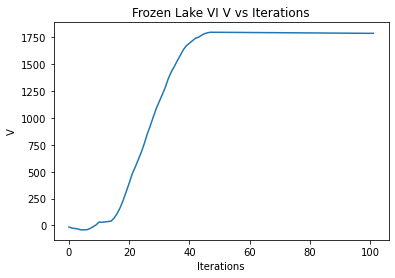

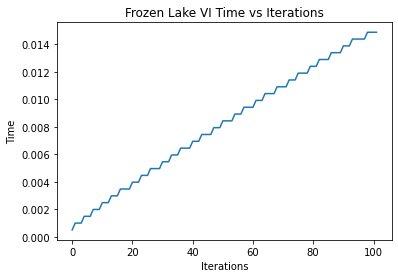

----------------------------------------




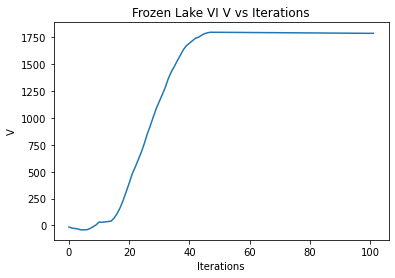

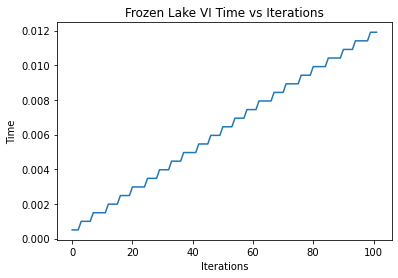

----------------------------------------




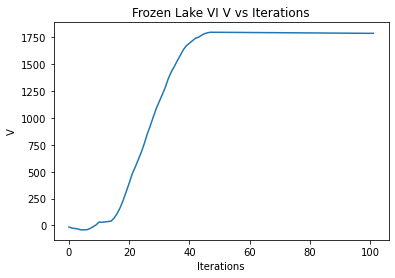

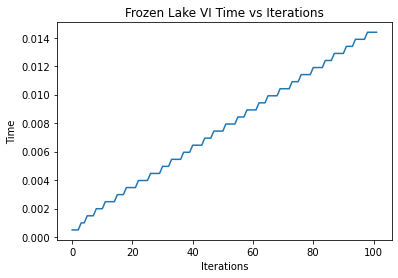

----------------------------------------




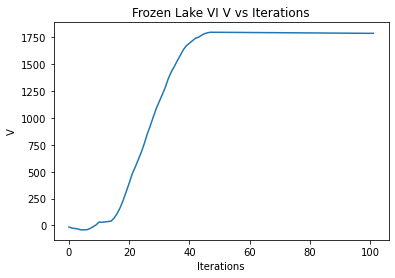

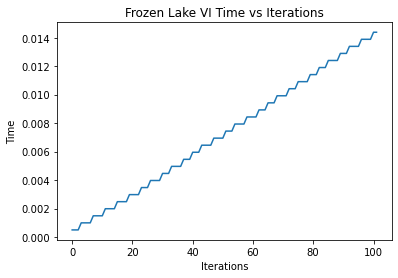

----------------------------------------




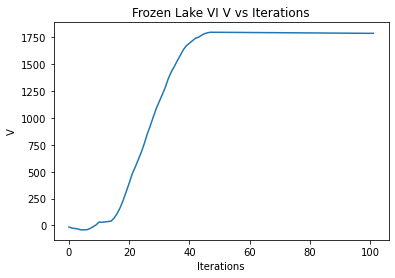

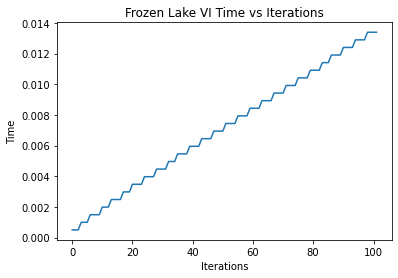

----------------------------------------




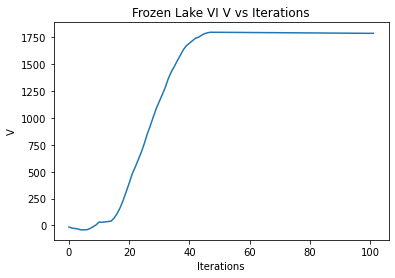

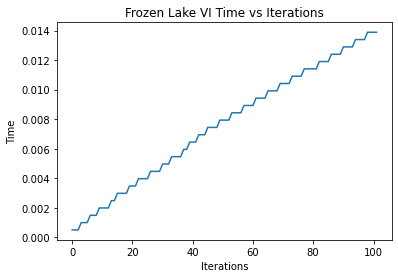

----------------------------------------




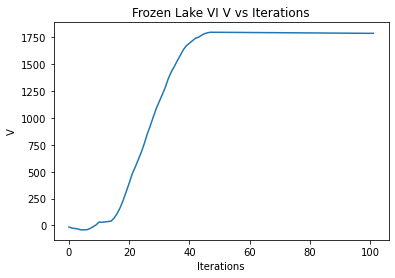

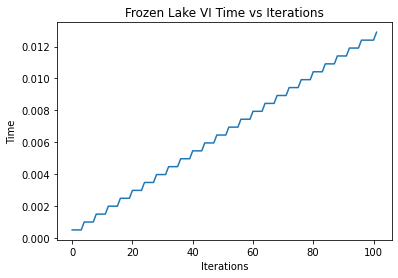

----------------------------------------




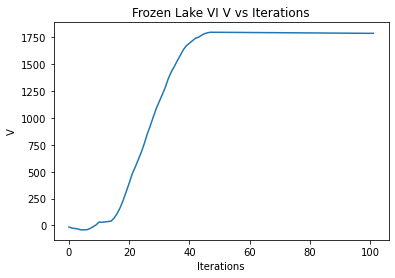

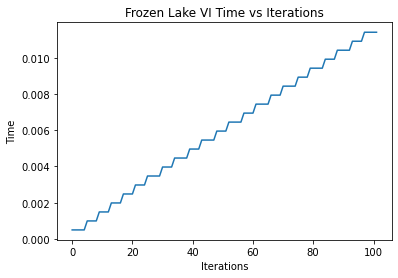

----------------------------------------




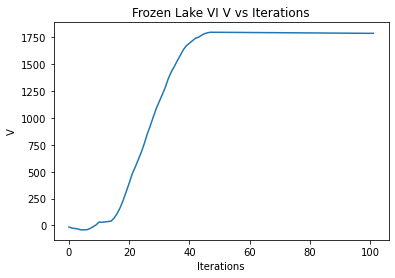

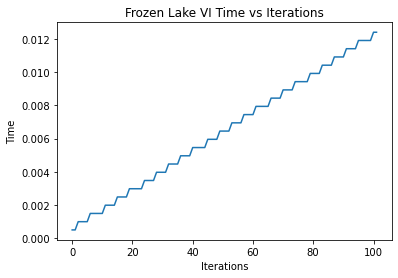

----------------------------------------




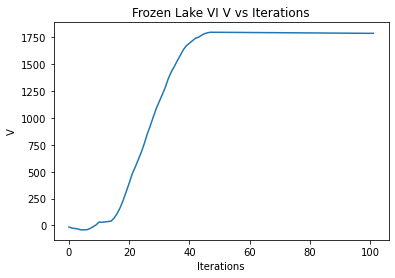

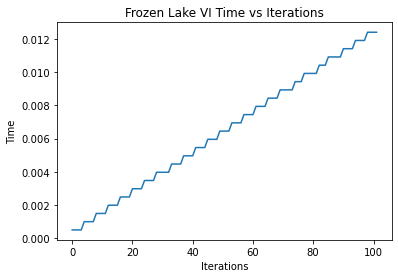

----------------------------------------




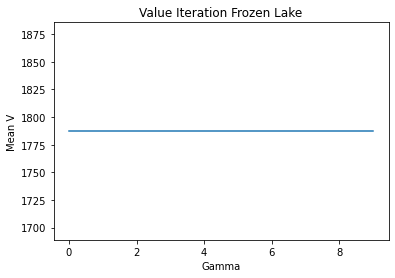

In [14]:
print('VI Min Epsilon')
size = [.1, .01, .001, .0001, .00001, .000001, .0000001, .00000001, .000000001, .0000000001]
rewards_vi = []
for s in size:
    value_iteration_forest = mdptoolbox.mdp.ValueIteration(transitions=transition_matrix,
                                        reward=rewards,
                                        gamma=.99999, epsilon=s)
    value_iteration_forest_stats = value_iteration_forest.run()
    value_iteration_forest_policy = np.array(value_iteration_forest.policy)#.reshape(nrow, ncol)

#     plot_learning(policy_iteration_forest_stats, 'Forest PI', 'Policy Difference')

    plot_mean_v_learning(value_iteration_forest_stats, 'Frozen Lake VI','V')
    # plot_mean_v_learning(q_learning_forest_stats, 'Forest QLearning', 'V')

#     plot_learning(policy_iteration_forest_stats, 'Forest PI', 'Error')
    # plot_learning(q_learning_forest_stats, 'Forest QLearning', 'Error')

    plot_learning(value_iteration_forest_stats, 'Frozen Lake VI', 'Time')
    rewards_vi.append(value_iteration_forest_stats[-1]['Mean V'])
    # plot_learning(q_learning_forest_stats, 'Forest QLearning', 'Time')

    print("----------------------------------------")
    print()
    print()
    
plot_gamma(rewards_vi, 'Value Iteration Frozen Lake')

VI Frozen Lake


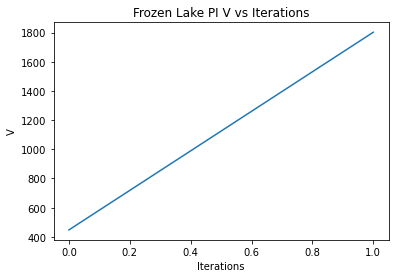

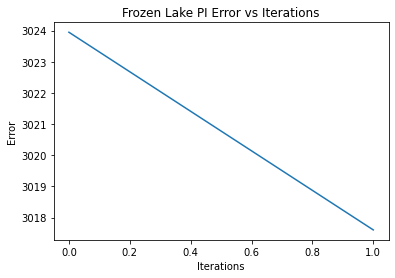

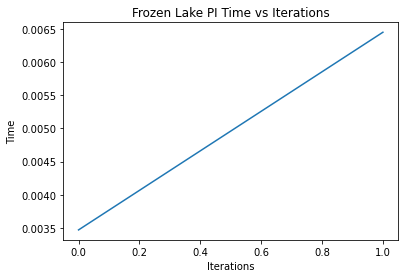

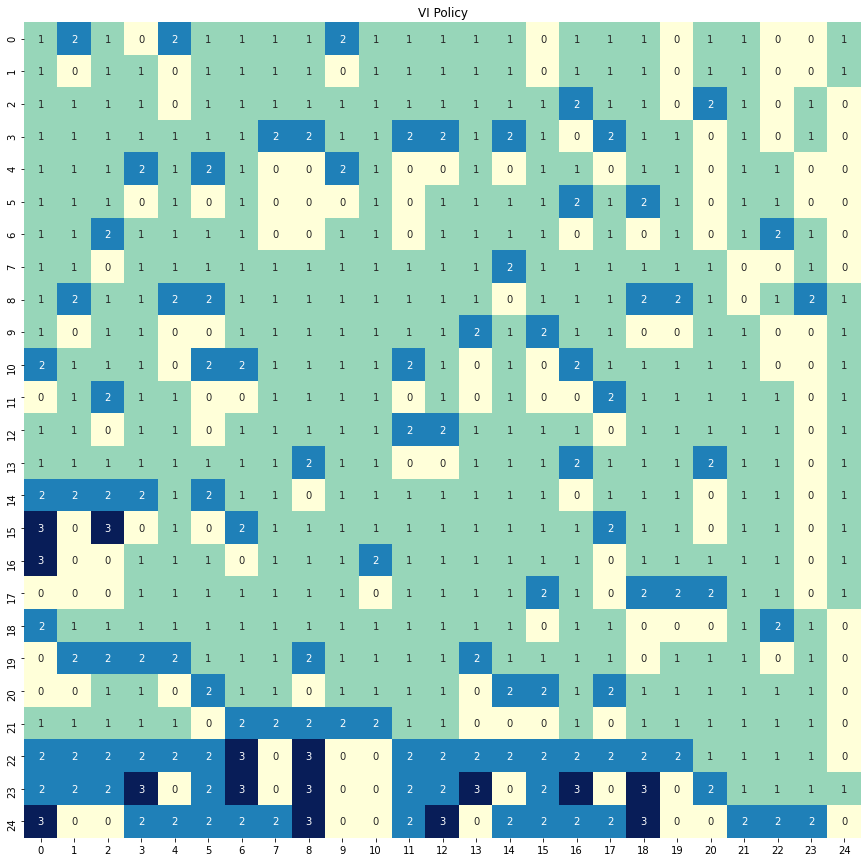

In [42]:
print("VI Frozen Lake")
value_iteration_forest = mdptoolbox.mdp.ValueIteration(transitions=transition_matrix,
                                    reward=rewards,
                                    gamma=.9999)
value_iteration_forest_stats = value_iteration_forest.run()
value_iteration_forest_policy = np.array(value_iteration_forest.policy)#.reshape(nrow, ncol)

plot_mean_v_learning(value_iteration_forest_stats, 'Frozen Lake PI','V')
plot_learning(value_iteration_forest_stats, 'Frozen Lake PI', 'Error')
plot_learning(value_iteration_forest_stats, 'Frozen Lake PI', 'Time')


plot_matrix(np.array(value_iteration_forest.policy).reshape(25, 25), 'VI Policy')

Frozen Lake 8x8
QLearning Frozen Lake
epsilon:  0.9512294221477116
-3000.0
3000.0


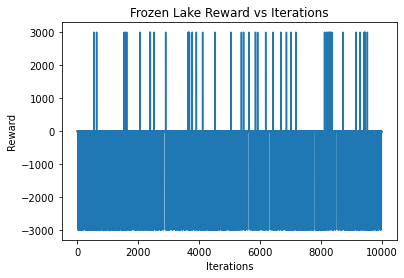

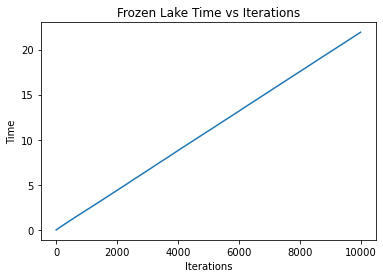

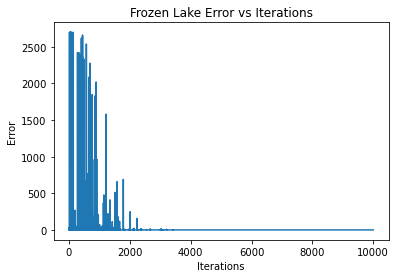

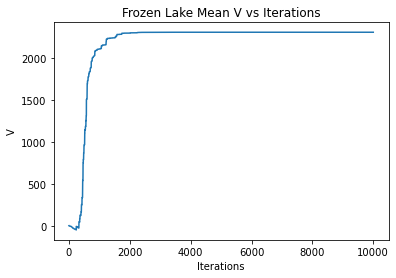

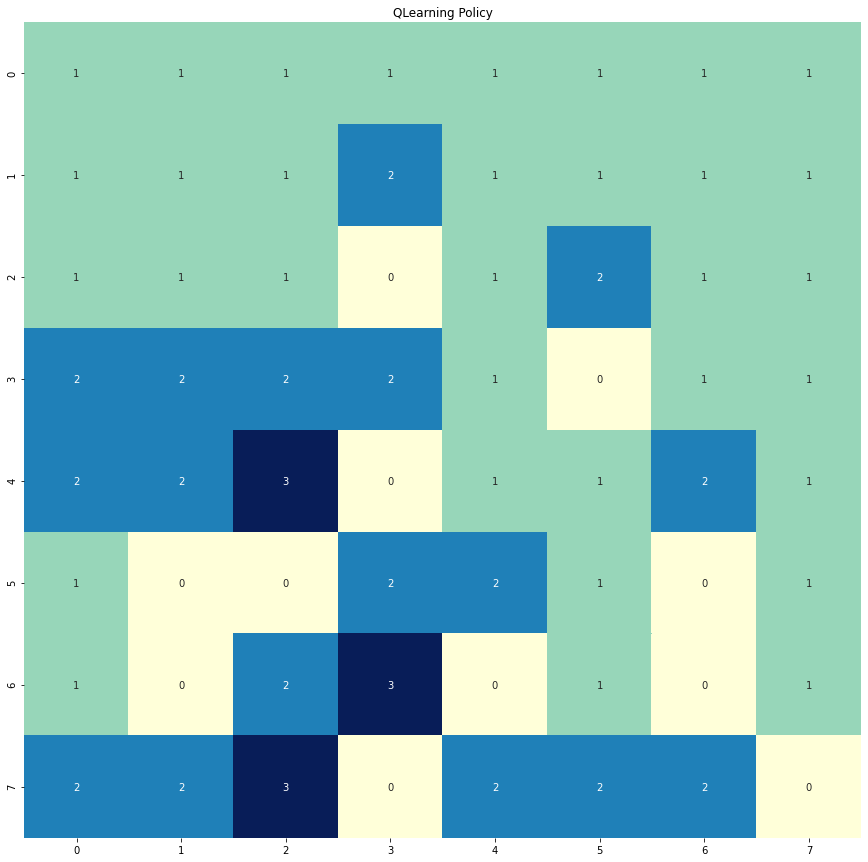

In [18]:
print("Frozen Lake 8x8")
print("QLearning Frozen Lake")
q_learning = mdptoolbox.mdp.QLearning(transitions=transition_matrix, reward=rewards,
                                          gamma=s, n_iter=500000, alpha=.9, alpha_decay=.9999999,
                                          epsilon_decay=.9999999)
q_learning_stats = q_learning.run()
plot_q_learning(q_learning_stats, 'Frozen Lake', 'Reward')
plot_learning(q_learning_stats, 'Frozen Lake', 'Time')
plot_learning(q_learning_stats, 'Frozen Lake', 'Error')
plot_mean_v_learning(q_learning_stats, 'Frozen Lake', 'Mean V')
plot_matrix(np.array(q_learning.policy).reshape(8, 8), 'QLearning Policy')

Frozen Lake 8x8
PI Frozen Lake


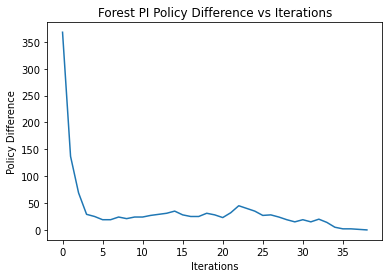

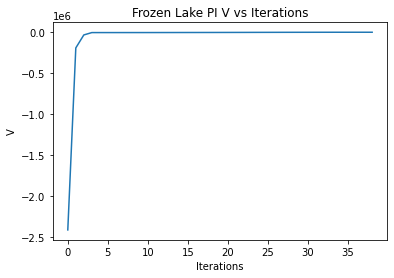

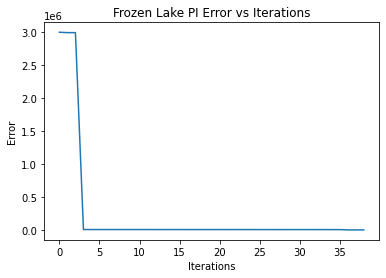

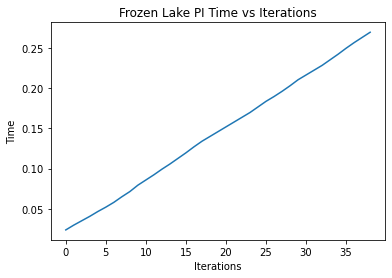

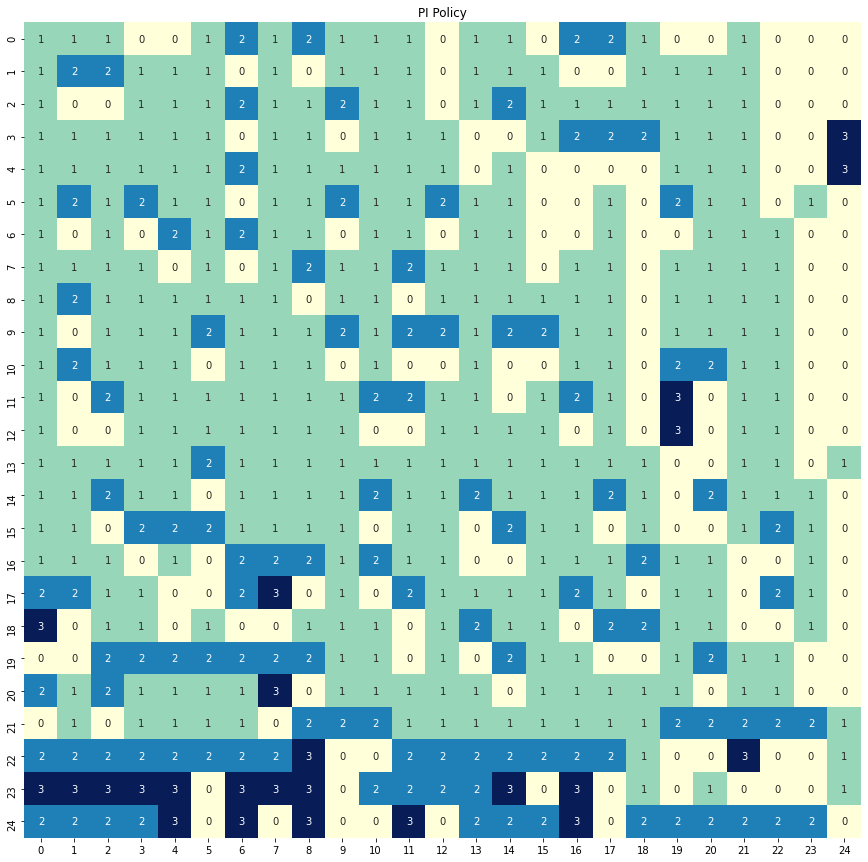

In [28]:
print("Frozen Lake 8x8")
print("PI Frozen Lake")
policy_iteration_forest = mdptoolbox.mdp.PolicyIteration(transitions=transition_matrix,
                                    reward=rewards,
                                    gamma=.99999)
policy_iteration_forest_stats = policy_iteration_forest.run()
policy_iteration_forest_policy = np.array(policy_iteration_forest.policy)#.reshape(nrow, ncol)


plot_learning(policy_iteration_forest_stats, 'Forest PI', 'Policy Difference')
plot_mean_v_learning(policy_iteration_forest_stats, 'Frozen Lake PI','V')
plot_learning(policy_iteration_forest_stats, 'Frozen Lake PI', 'Error')
plot_learning(policy_iteration_forest_stats, 'Frozen Lake PI', 'Time')


plot_matrix(np.array(policy_iteration_forest.policy).reshape(25, 25), 'PI Policy')

Frozen Lake 8x8
VI Frozen Lake


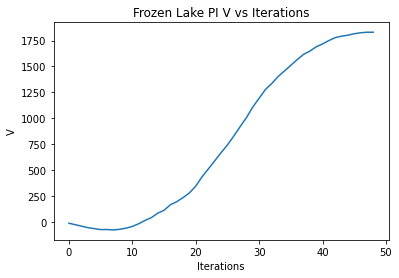

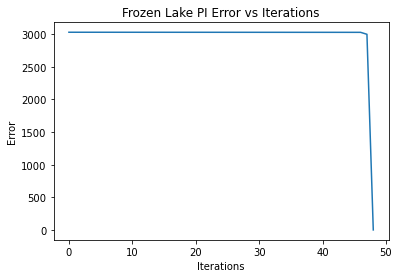

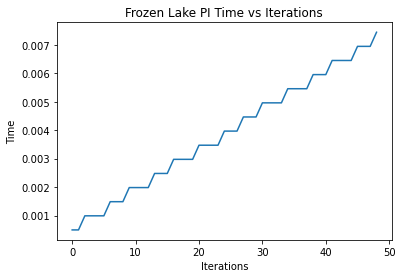

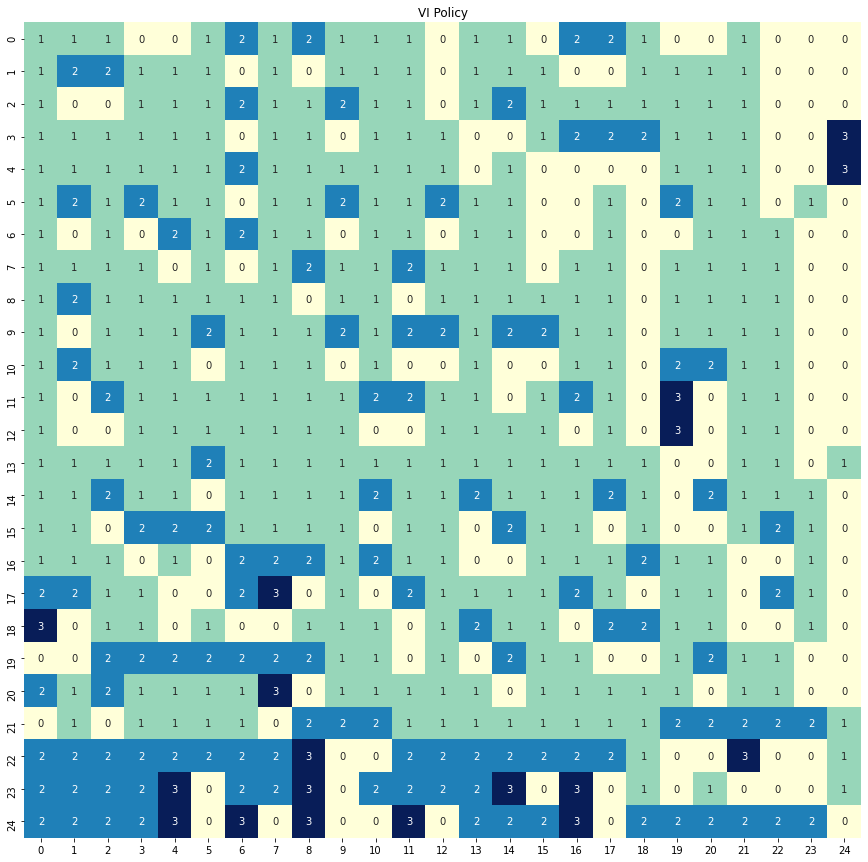

In [27]:
print("Frozen Lake 8x8")
print("VI Frozen Lake")
value_iteration_forest = mdptoolbox.mdp.ValueIteration(transitions=transition_matrix,
                                    reward=rewards,
                                    gamma=.99999)
value_iteration_forest_stats = value_iteration_forest.run()
value_iteration_forest_policy = np.array(value_iteration_forest.policy)#.reshape(nrow, ncol)

plot_mean_v_learning(value_iteration_forest_stats, 'Frozen Lake PI','V')
plot_learning(value_iteration_forest_stats, 'Frozen Lake PI', 'Error')
plot_learning(value_iteration_forest_stats, 'Frozen Lake PI', 'Time')


plot_matrix(np.array(value_iteration_forest.policy).reshape(25, 25), 'VI Policy')

Frozen Lake QLearning Gamma exploration
epsilon:  0.1
-3000.0
3000.0


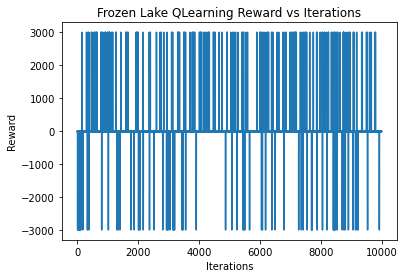

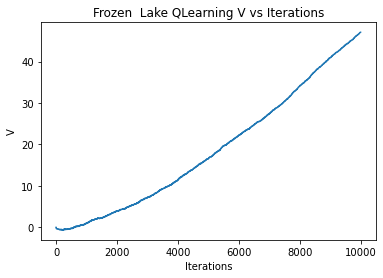

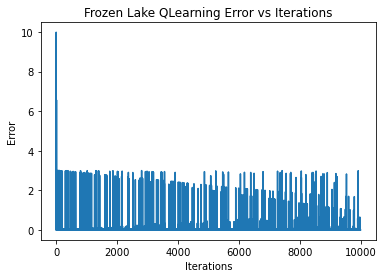

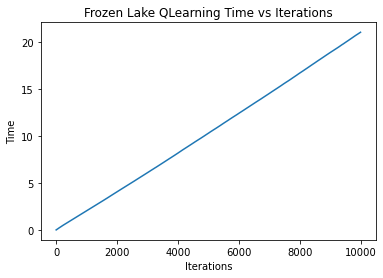

epsilon:  0.1
-3000.0
3000.0


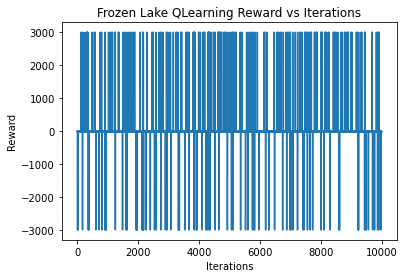

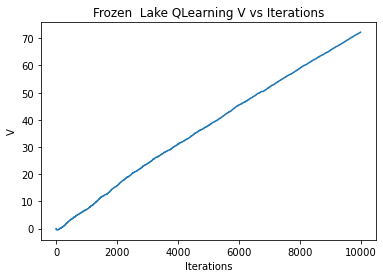

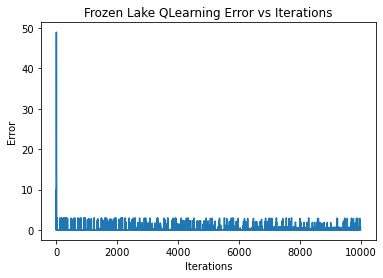

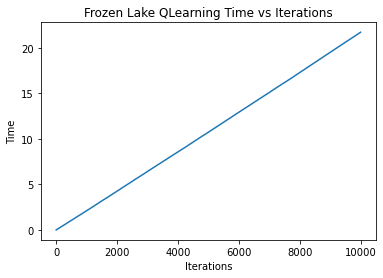

epsilon:  0.1
-3000.0
3000.0


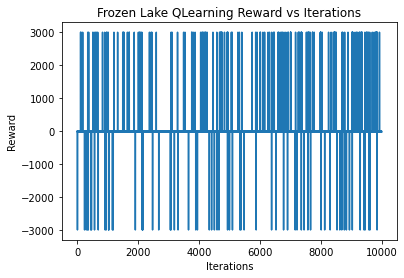

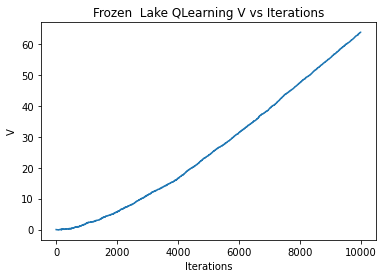

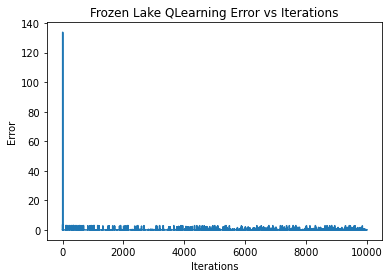

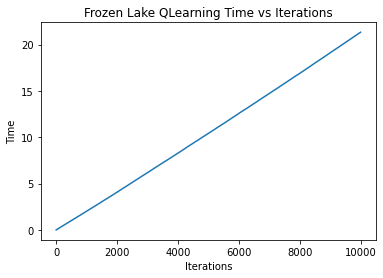

epsilon:  0.1
-3000.0
3000.0


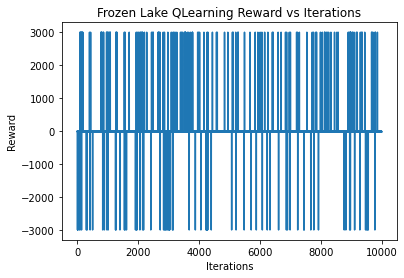

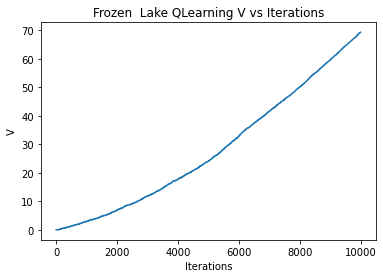

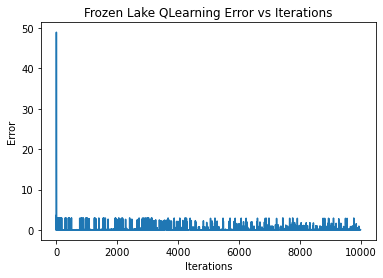

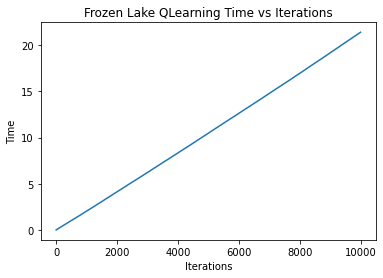

epsilon:  0.1
-3000.0
3000.0


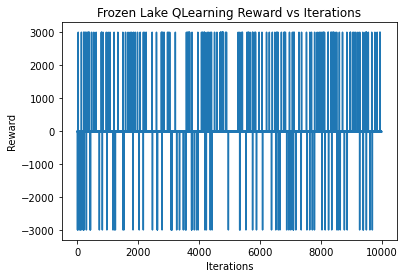

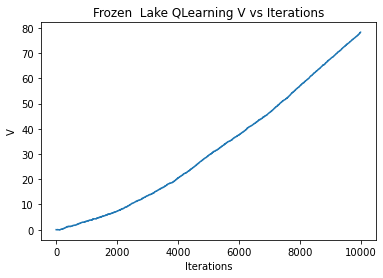

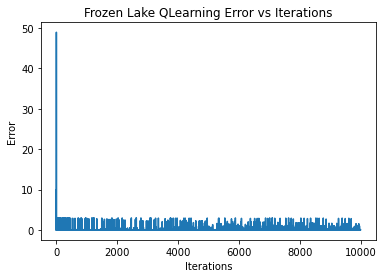

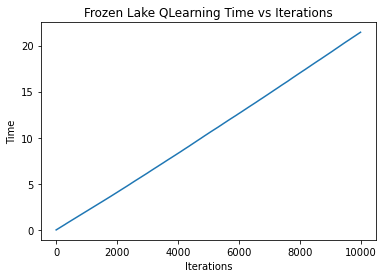

epsilon:  0.1
-3000.0
3000.0


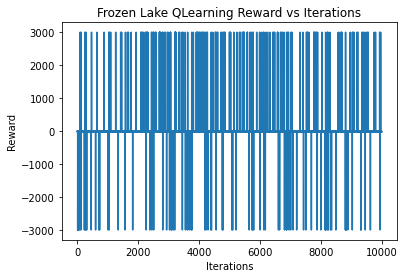

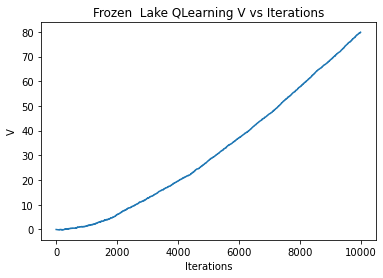

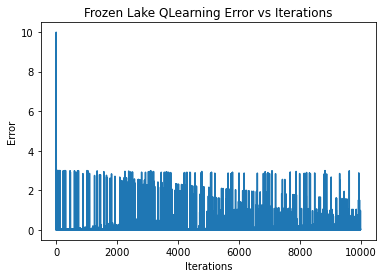

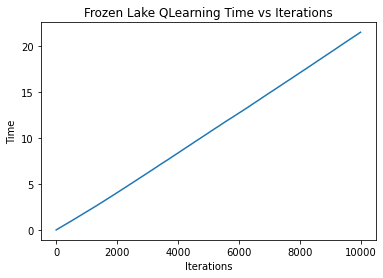

epsilon:  0.1
-3000.0
3000.0


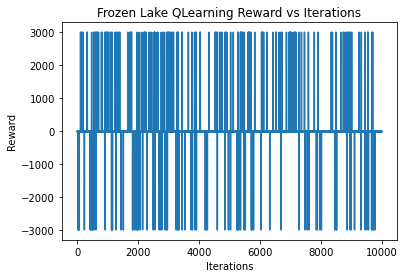

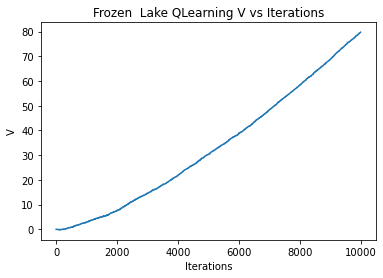

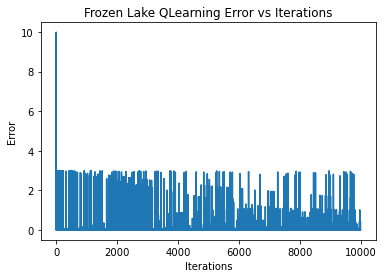

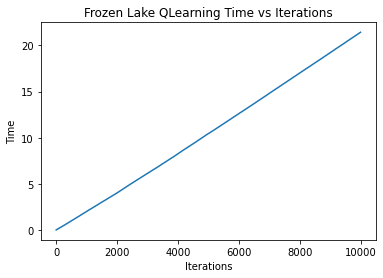

epsilon:  0.1
-3000.0
3000.0


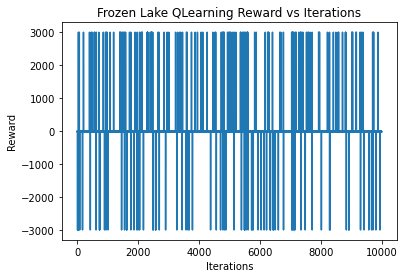

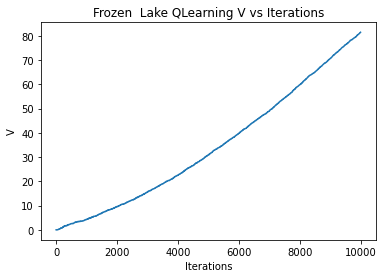

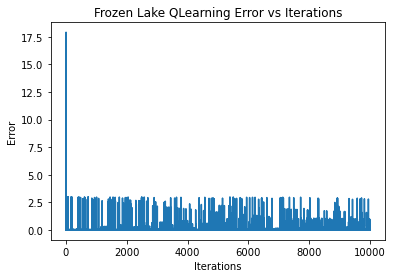

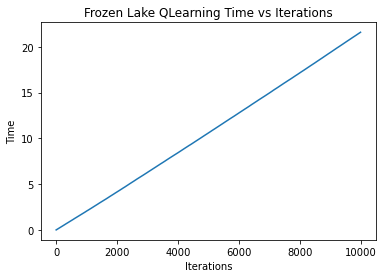

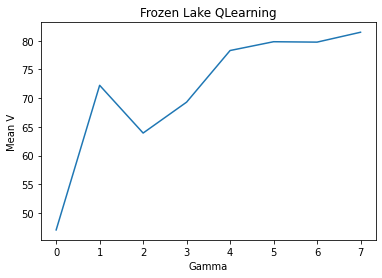

In [31]:
size = [.6, .7, .8, .9, .99, .999, .9999, .99999]
print('Frozen Lake QLearning Gamma exploration')
# iters_list = [40000000, 20000000, 10000000, 5000000, 1000000]
# time_taken = []
rewards_qlearning = []
for s in size:
    q_learning = mdptoolbox.mdp.QLearning(transitions=transition_matrix, reward=rewards,
                                          gamma=s, n_iter=500000, alpha=.9#, alpha_decay=.99, epsilon_decay=.9999999# alpha=.6, alpha_decay=.1
                                          #,
                                          # epsilon=.1, alpha=.2,
                                          # epsilon_decay=.1, alpha_decay=.1,
                                          # epsilon_min=.01
                                          )
    q_learning_stats = q_learning.run()
    plot_q_learning(q_learning_stats, 'Frozen Lake QLearning', 'Reward')
    plot_mean_v_learning(q_learning_stats, 'Frozen  Lake QLearning', 'V')
    plot_learning(q_learning_stats, 'Frozen Lake QLearning', 'Error')
    plot_learning(q_learning_stats, 'Frozen Lake QLearning', 'Time')
    rewards_qlearning.append(q_learning_stats[-1]['Mean V'])
#     time_taken.append(q_learning.time)
# plot_q_learning_timetaken(time_taken)
plot_gamma(rewards_qlearning, 'Frozen Lake QLearning')

Frozen Lake QLearning Alpha Decay exploration
epsilon:  0.1
-3000.0
3000.0


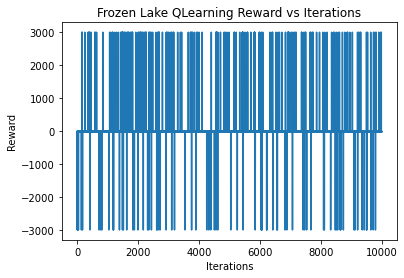

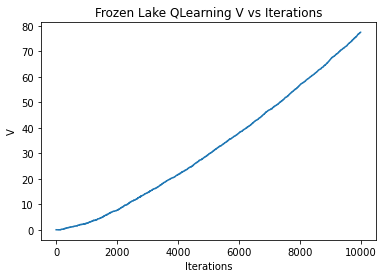

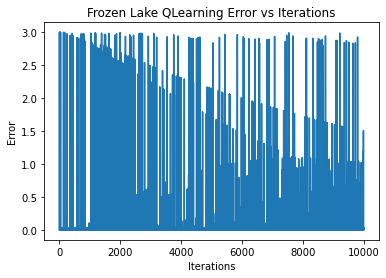

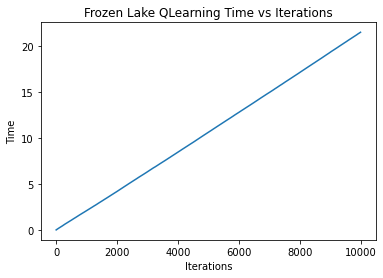

epsilon:  0.1
-3000.0
3000.0


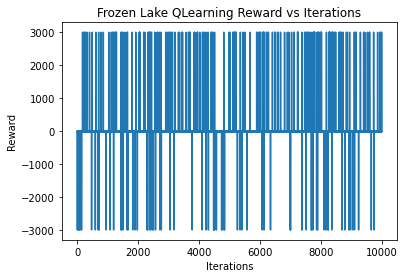

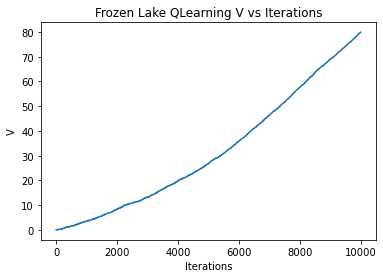

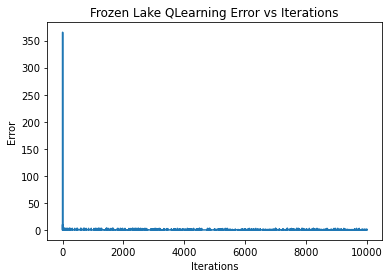

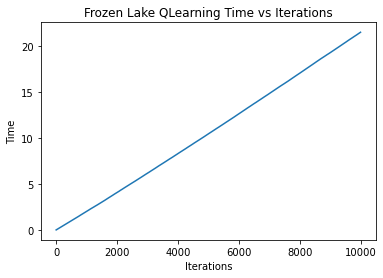

epsilon:  0.1
-3000.0
3000.0


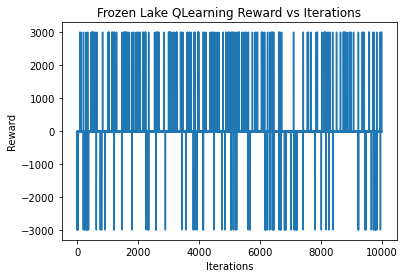

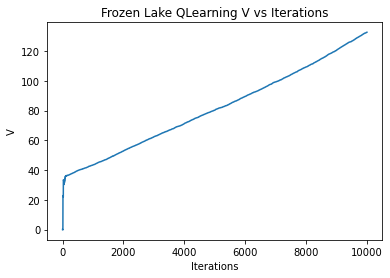

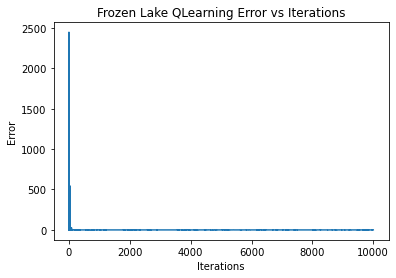

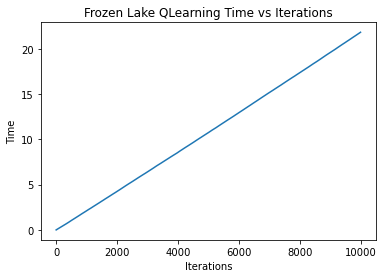

epsilon:  0.1
-3000.0
3000.0


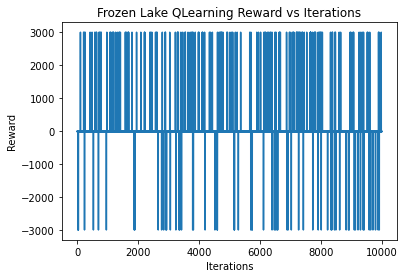

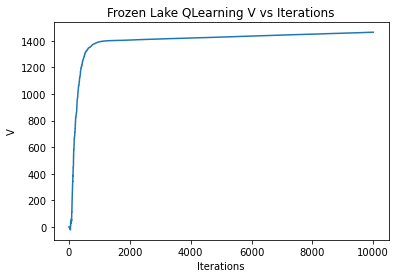

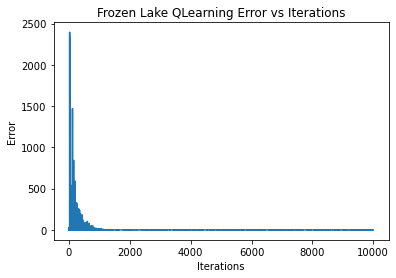

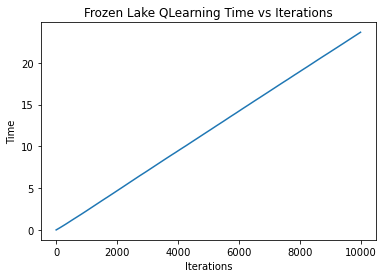

epsilon:  0.1
-3000.0
3000.0


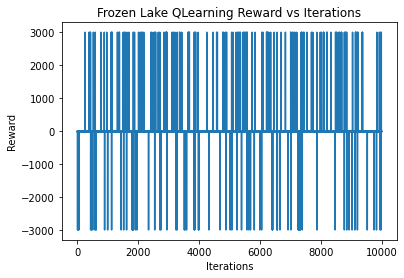

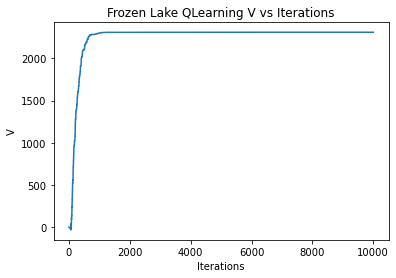

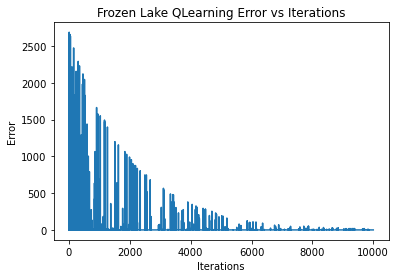

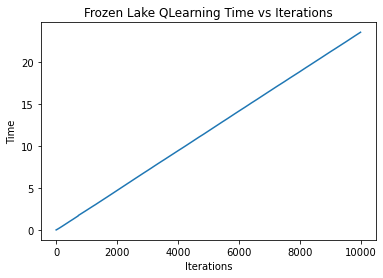

epsilon:  0.1
-3000.0
3000.0


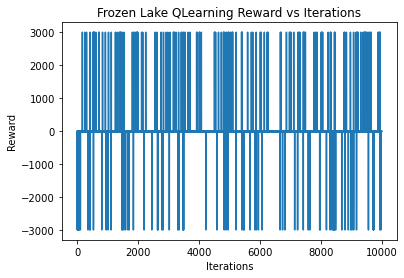

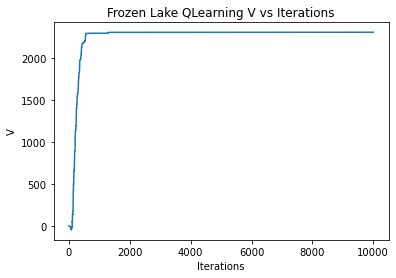

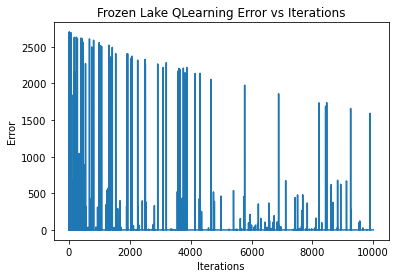

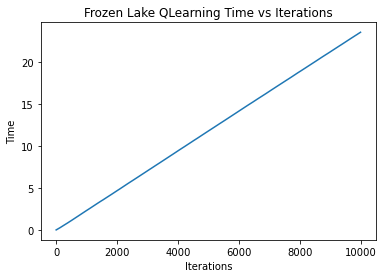

epsilon:  0.1
-3000.0
3000.0


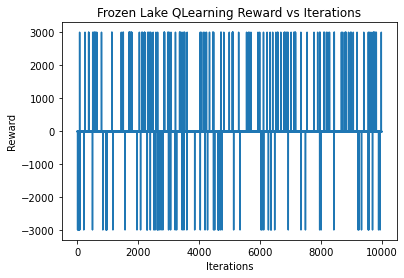

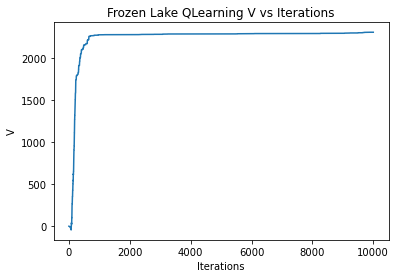

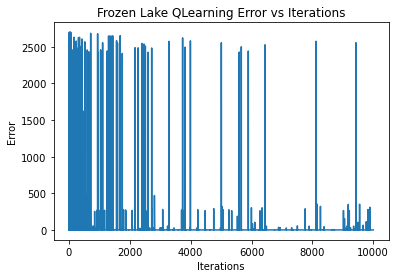

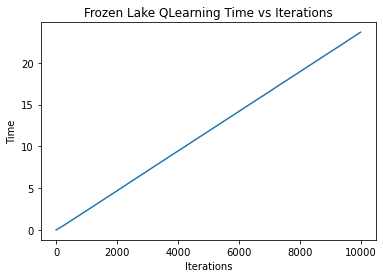

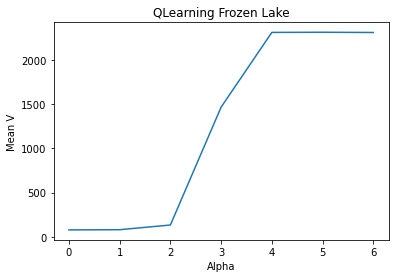

In [32]:
size = [.9, .99, .999, .9999, .99999, .999999, .9999999]
print('Frozen Lake QLearning Alpha Decay exploration')
# iters_list = [40000000, 20000000, 10000000, 5000000, 1000000]
# time_taken = []
rewards_qlearning = []
for s in size:
    q_learning = mdptoolbox.mdp.QLearning(transitions=transition_matrix, reward=rewards,
                                          gamma=.99999, n_iter=500000, alpha=.9, alpha_decay=s#, epsilon_decay=.9999999# alpha=.6, alpha_decay=.1
                                          #,
                                          # epsilon=.1, alpha=.2,
                                          # epsilon_decay=.1, alpha_decay=.1,
                                          # epsilon_min=.01
                                          )
    q_learning_stats = q_learning.run()
    plot_q_learning(q_learning_stats, 'Frozen Lake QLearning', 'Reward')
    plot_mean_v_learning(q_learning_stats, 'Frozen Lake QLearning', 'V')
    plot_learning(q_learning_stats, 'Frozen Lake QLearning', 'Error')
    plot_learning(q_learning_stats, 'Frozen Lake QLearning', 'Time')
    rewards_qlearning.append(q_learning_stats[-1]['Mean V'])
#     time_taken.append(q_learning.time)
# plot_q_learning_timetaken(time_taken)
plot_alpha(rewards_qlearning, 'QLearning Frozen Lake')

Frozen Lake QLearning Epsilon Decay exploration
epsilon:  0.1


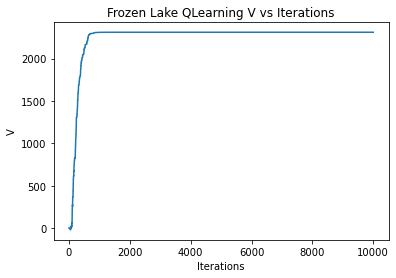

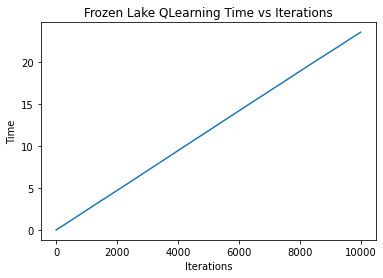

epsilon:  0.1


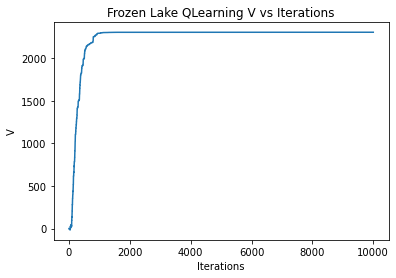

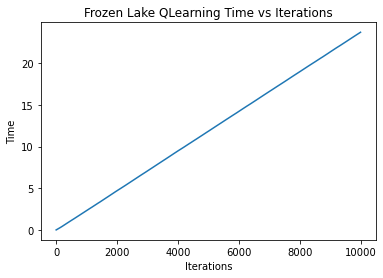

epsilon:  0.1


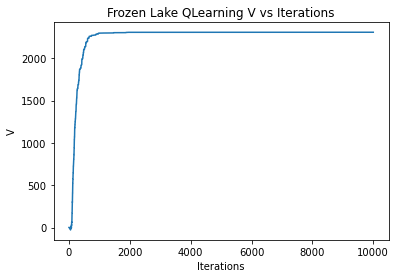

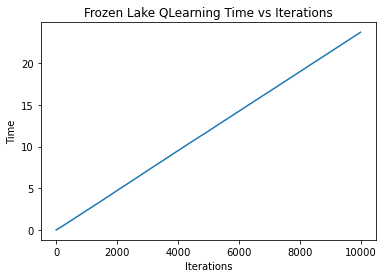

epsilon:  0.1


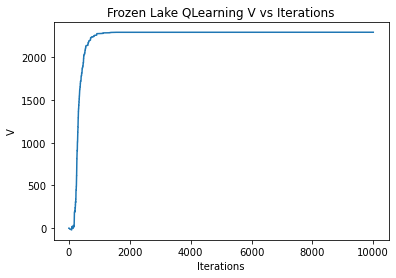

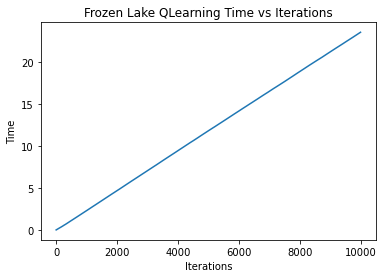

epsilon:  0.1


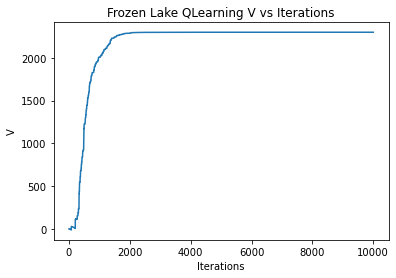

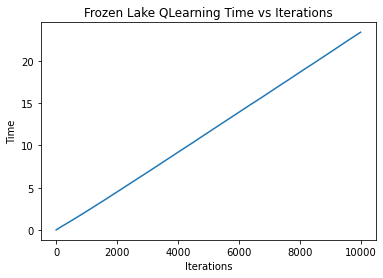

epsilon:  0.6065305080711497


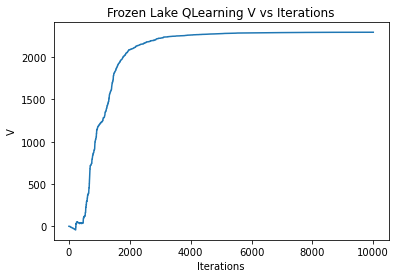

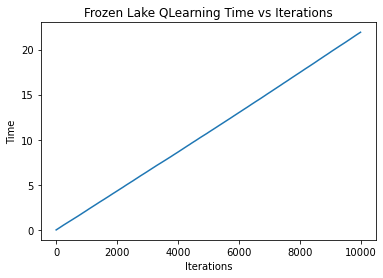

epsilon:  0.9512294221477116


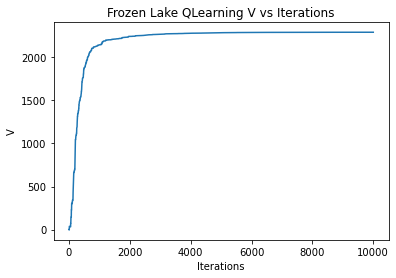

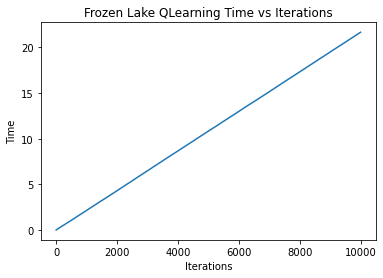

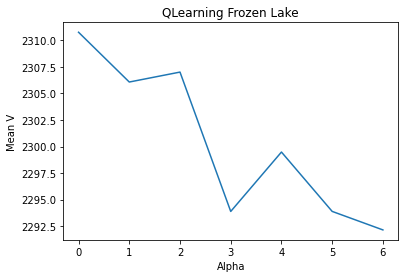

In [48]:
size = [.9, .99, .999, .9999, .99999, .999999, .9999999]
print('Frozen Lake QLearning Epsilon Decay exploration')
# iters_list = [40000000, 20000000, 10000000, 5000000, 1000000]
# time_taken = []
rewards_qlearning = []
for s in size:
    q_learning = mdptoolbox.mdp.QLearning(transitions=transition_matrix, reward=rewards,
                                          gamma=.99999, n_iter=500000, alpha=.9, alpha_decay=.99999,
                                          epsilon_decay=s)
    q_learning_stats = q_learning.run()
    plot_mean_v_learning(q_learning_stats, 'Frozen Lake QLearning', 'V')
    plot_learning(q_learning_stats, 'Frozen Lake QLearning', 'Time')
    rewards_qlearning.append(q_learning_stats[-1]['Mean V'])
#     time_taken.append(q_learning.time)
# plot_q_learning_timetaken(time_taken)
plot_epsilon(rewards_qlearning, 'QLearning Frozen Lake')

QLearning Frozen Lake
epsilon:  0.1
-3000.0
3000.0


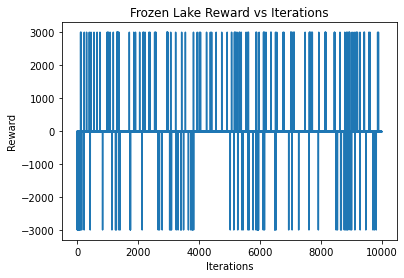

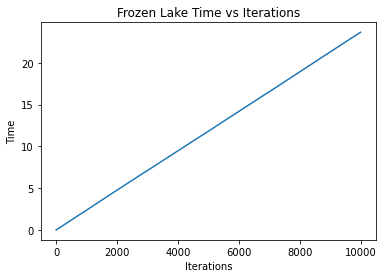

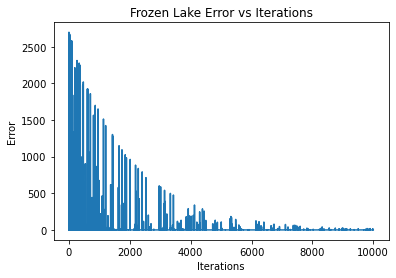

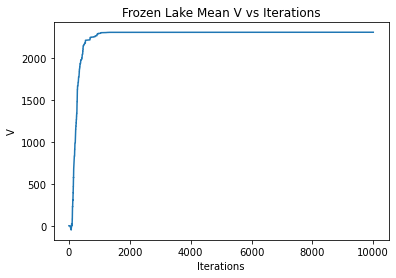

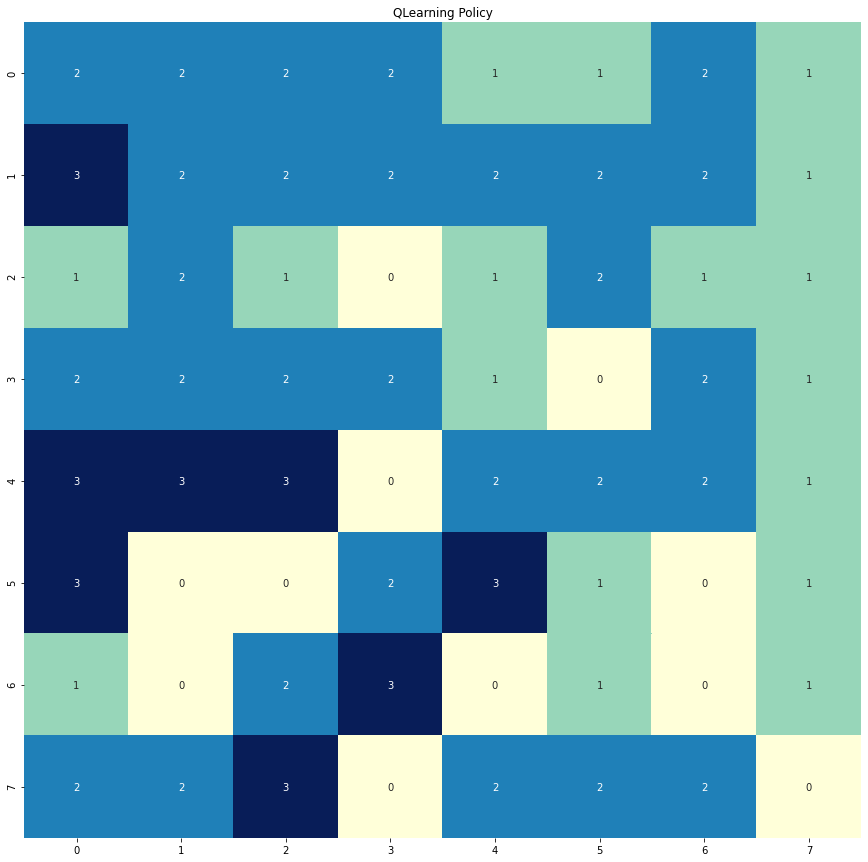

In [49]:
print("QLearning Frozen Lake")
q_learning = mdptoolbox.mdp.QLearning(transitions=transition_matrix, reward=rewards,
                                          gamma=.99999, n_iter=500000, alpha=.9, alpha_decay=.99999,
                                          epsilon_decay=.9)
q_learning_stats = q_learning.run()
plot_q_learning(q_learning_stats, 'Frozen Lake', 'Reward')
plot_learning(q_learning_stats, 'Frozen Lake', 'Time')
plot_learning(q_learning_stats, 'Frozen Lake', 'Error')
plot_mean_v_learning(q_learning_stats, 'Frozen Lake', 'Mean V')
plot_matrix(np.array(q_learning.policy).reshape(8, 8), 'QLearning Policy')

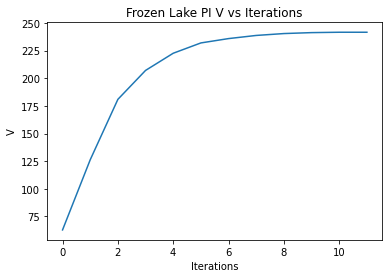

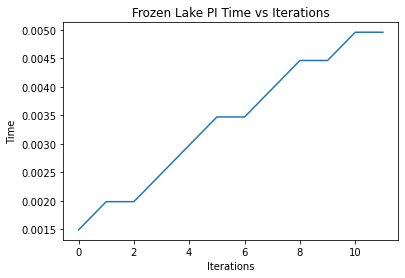

----------------------------------------




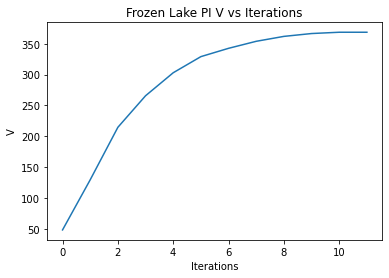

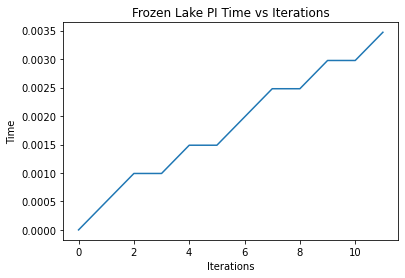

----------------------------------------




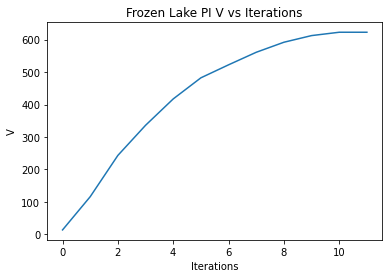

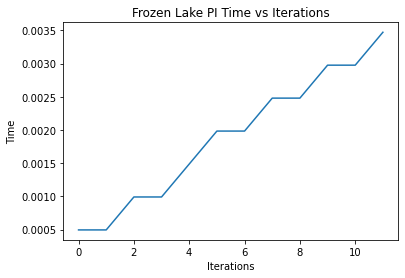

----------------------------------------




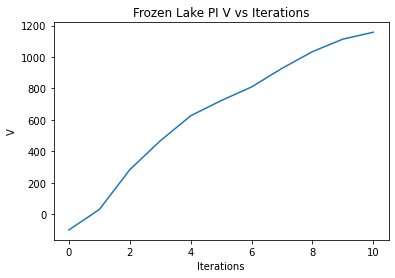

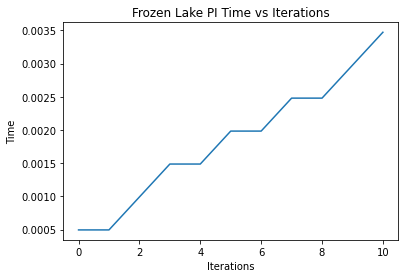

----------------------------------------




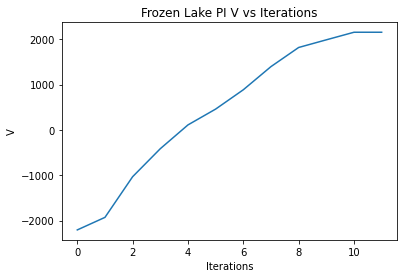

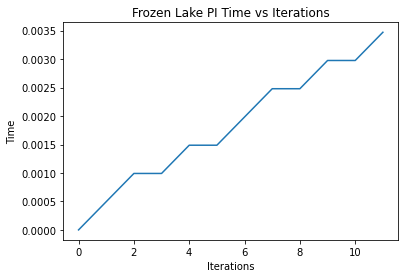

----------------------------------------




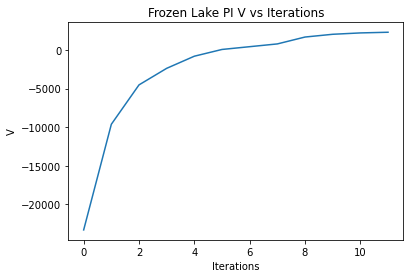

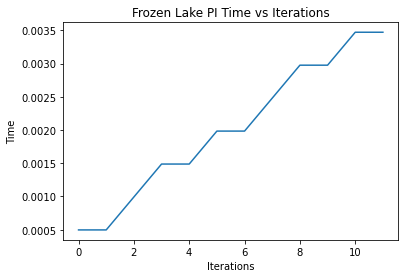

----------------------------------------




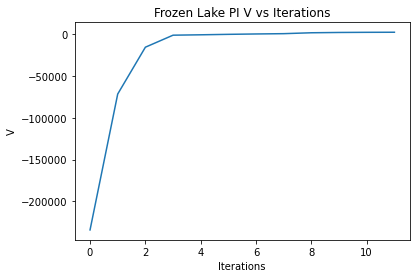

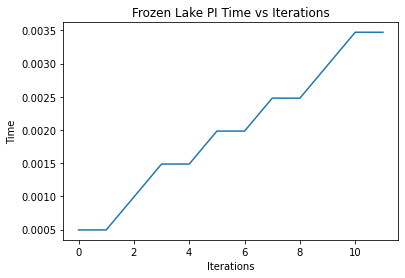

----------------------------------------




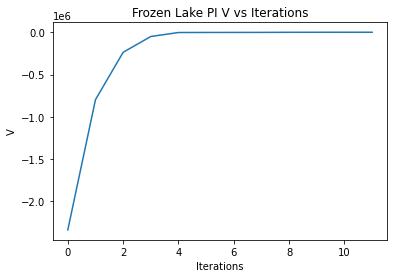

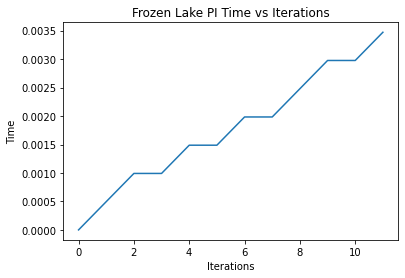

----------------------------------------




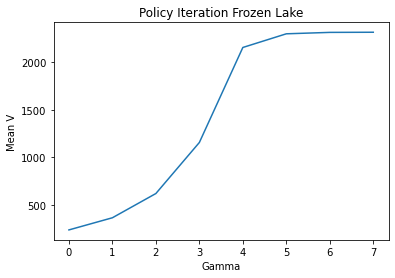

In [50]:
size = [.6, .7, .8, .9, .99, .999, .9999, .99999]
rewards_pi = []
for s in size:
    policy_iteration_forest = mdptoolbox.mdp.PolicyIteration(transitions=transition_matrix,
                                        reward=rewards,
                                        gamma=s)
    policy_iteration_forest_stats = policy_iteration_forest.run()
    policy_iteration_forest_policy = np.array(policy_iteration_forest.policy)#.reshape(nrow, ncol)

    plot_mean_v_learning(policy_iteration_forest_stats, 'Frozen Lake PI','V')

    plot_learning(policy_iteration_forest_stats, 'Frozen Lake PI', 'Time')
    rewards_pi.append(policy_iteration_forest_stats[-1]['Mean V'])

    print("----------------------------------------")
    print()
    print()
    
plot_gamma(rewards_pi, 'Policy Iteration Frozen Lake')

PI Frozen Lake


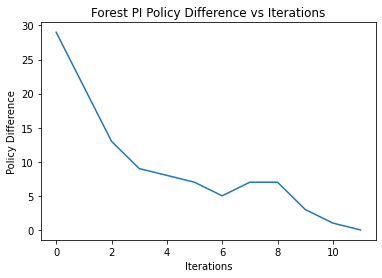

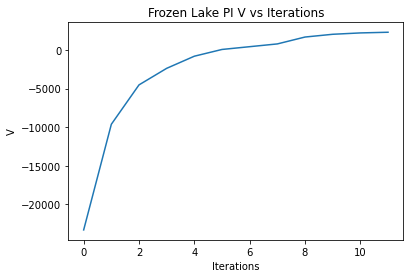

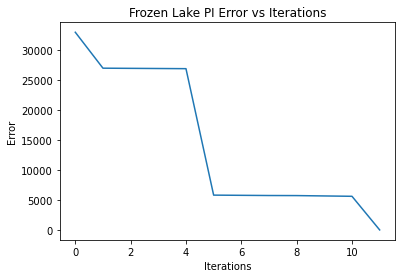

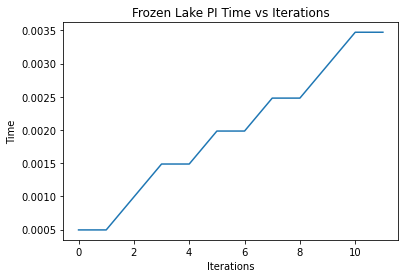

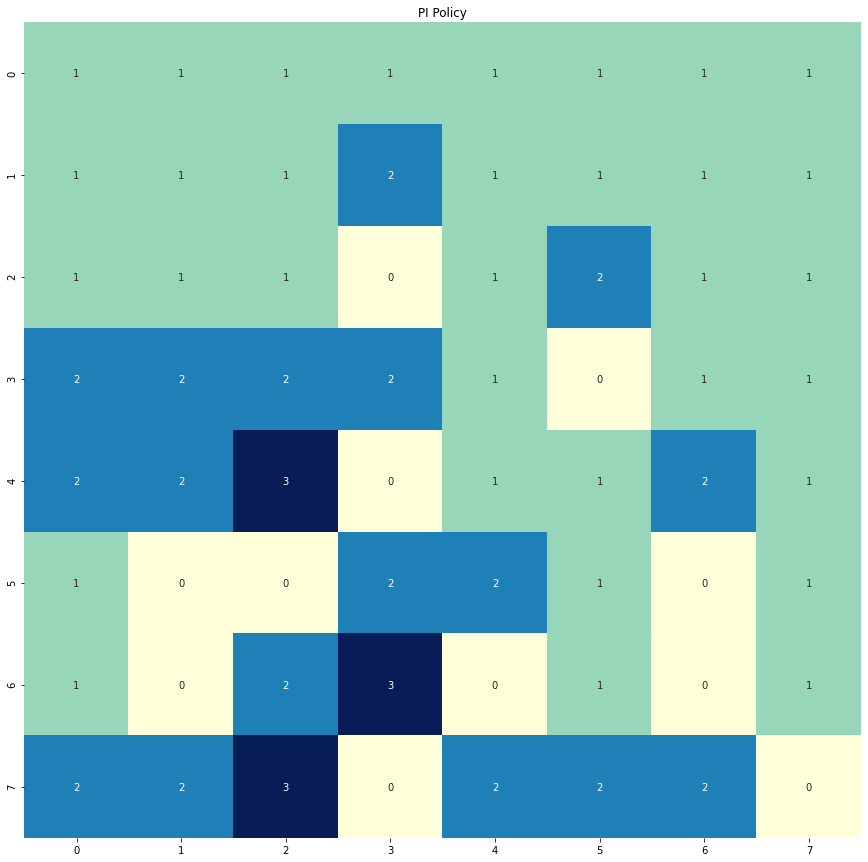

In [52]:
print("PI Frozen Lake")
policy_iteration_forest = mdptoolbox.mdp.PolicyIteration(transitions=transition_matrix,
                                    reward=rewards,
                                    gamma=.999)
policy_iteration_forest_stats = policy_iteration_forest.run()
policy_iteration_forest_policy = np.array(policy_iteration_forest.policy)#.reshape(nrow, ncol)


plot_learning(policy_iteration_forest_stats, 'Forest PI', 'Policy Difference')
plot_mean_v_learning(policy_iteration_forest_stats, 'Frozen Lake PI','V')
plot_learning(policy_iteration_forest_stats, 'Frozen Lake PI', 'Error')
plot_learning(policy_iteration_forest_stats, 'Frozen Lake PI', 'Time')


plot_matrix(np.array(policy_iteration_forest.policy).reshape(8, 8), 'PI Policy')

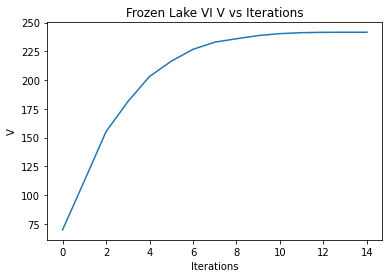

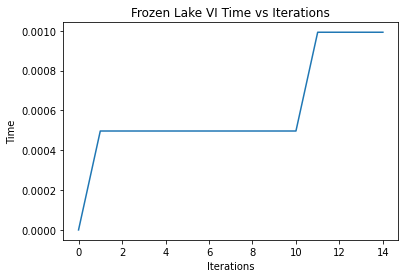

----------------------------------------




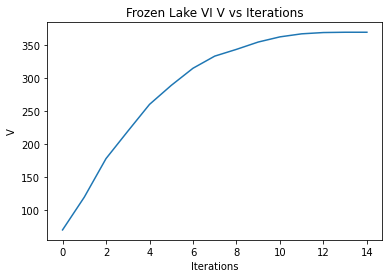

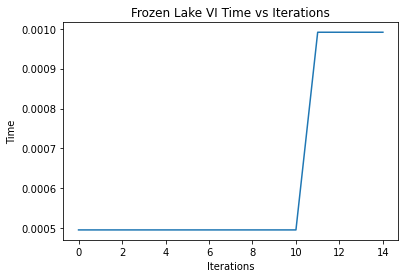

----------------------------------------




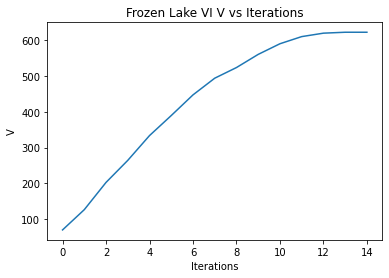

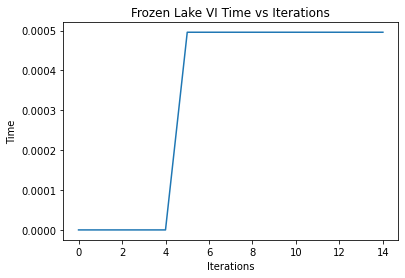

----------------------------------------




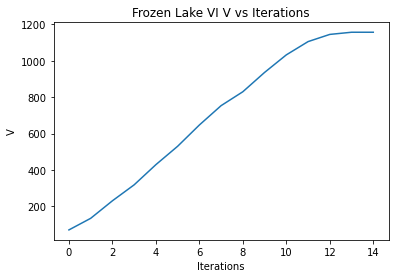

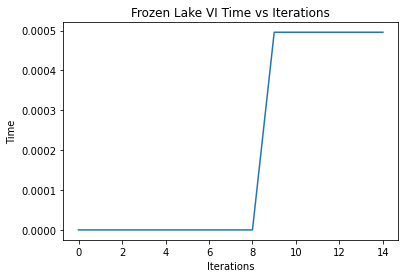

----------------------------------------




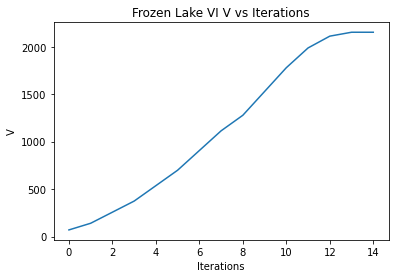

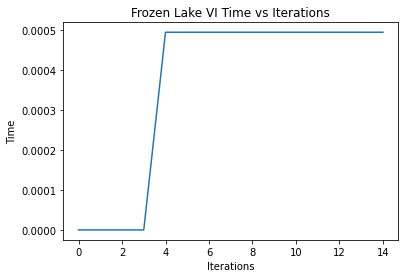

----------------------------------------




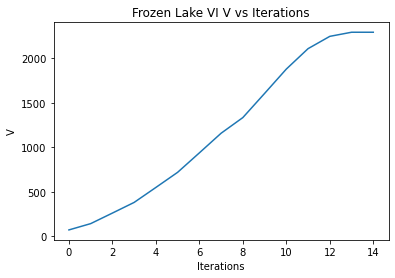

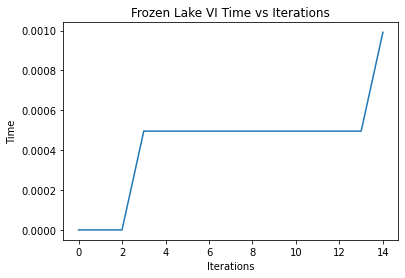

----------------------------------------




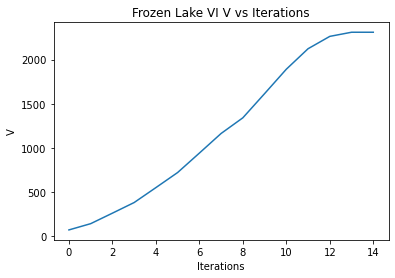

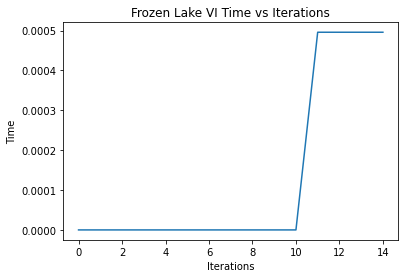

----------------------------------------




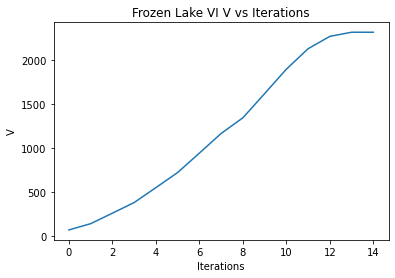

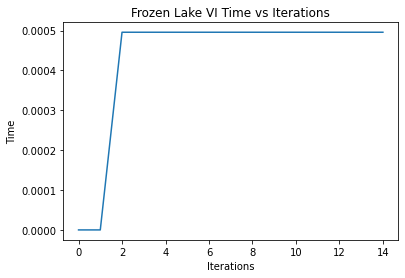

----------------------------------------




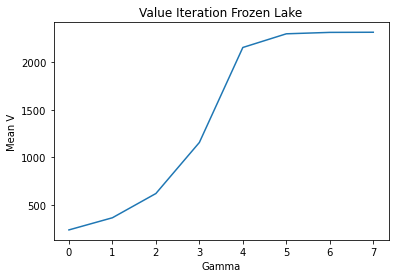

In [53]:
size = [.6, .7, .8, .9, .99, .999, .9999, .99999]
rewards_vi = []
for s in size:
    value_iteration_forest = mdptoolbox.mdp.ValueIteration(transitions=transition_matrix,
                                        reward=rewards,
                                        gamma=s)
    value_iteration_forest_stats = value_iteration_forest.run()
    value_iteration_forest_policy = np.array(value_iteration_forest.policy)

    plot_mean_v_learning(value_iteration_forest_stats, 'Frozen Lake VI','V')
    plot_learning(value_iteration_forest_stats, 'Frozen Lake VI', 'Time')
    rewards_vi.append(value_iteration_forest_stats[-1]['Mean V'])

    print("----------------------------------------")
    print()
    print()
    
plot_gamma(rewards_vi, 'Value Iteration Frozen Lake')

VI Min Epsilon


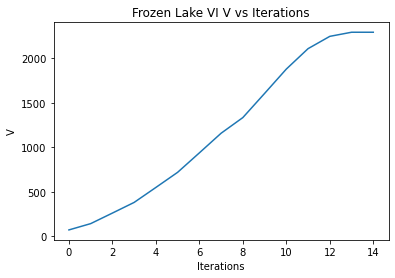

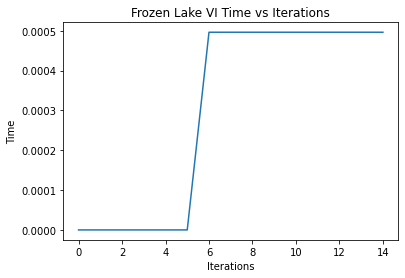

----------------------------------------




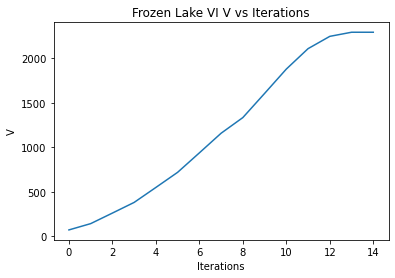

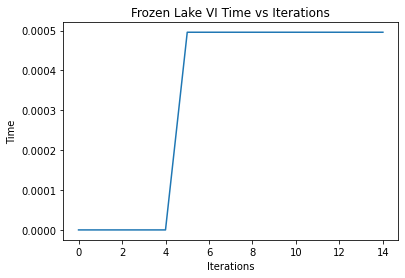

----------------------------------------




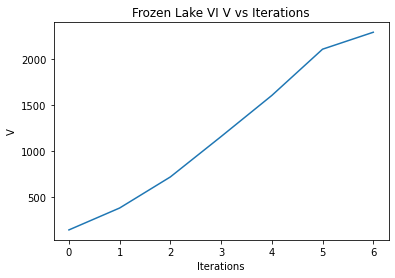

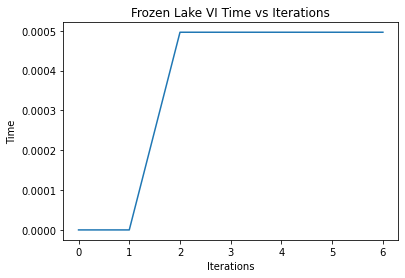

----------------------------------------




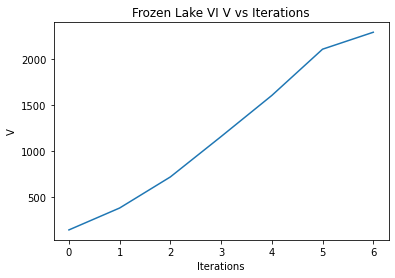

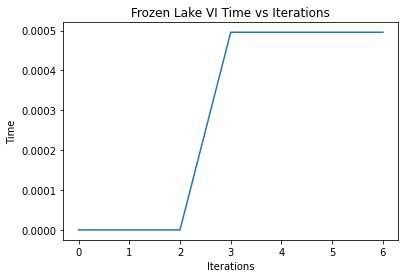

----------------------------------------




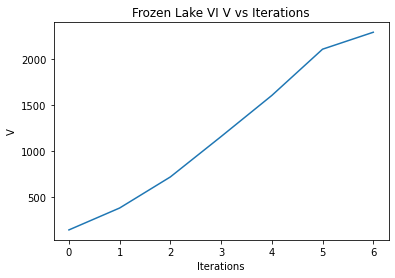

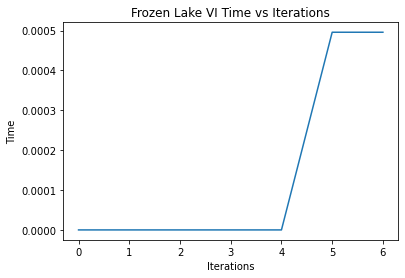

----------------------------------------




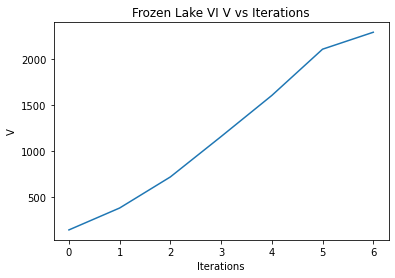

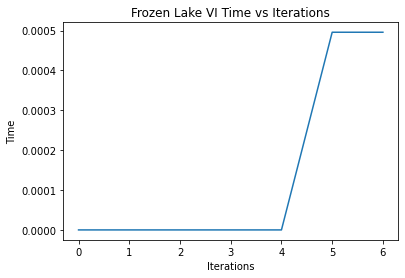

----------------------------------------




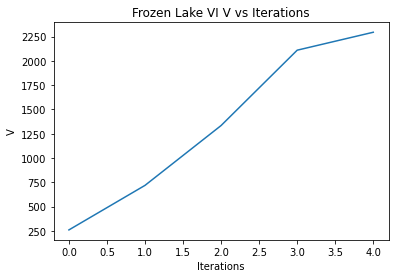

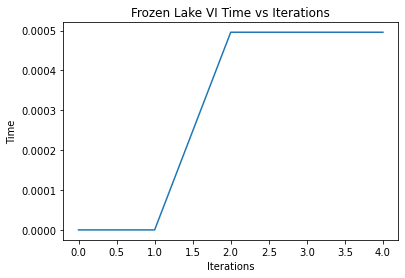

----------------------------------------




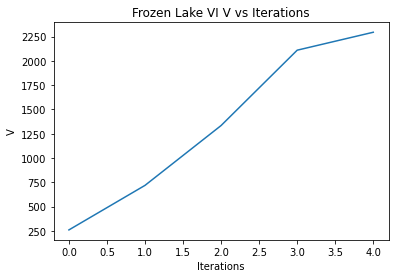

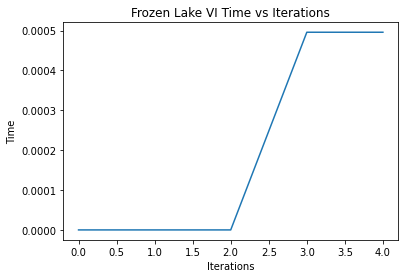

----------------------------------------




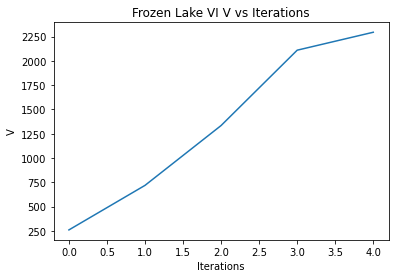

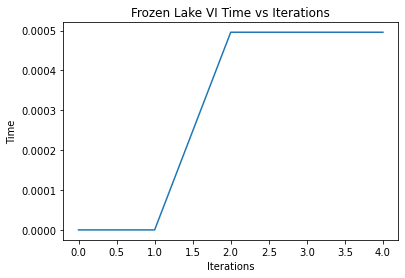

----------------------------------------




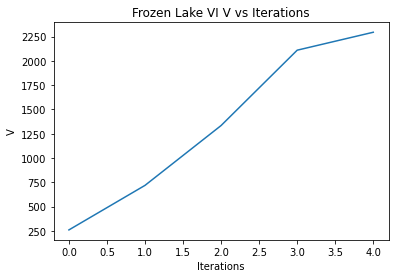

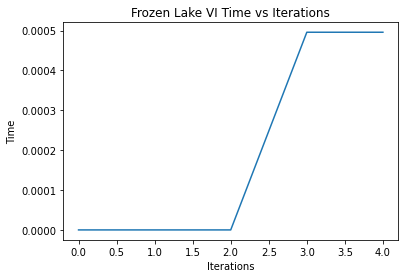

----------------------------------------




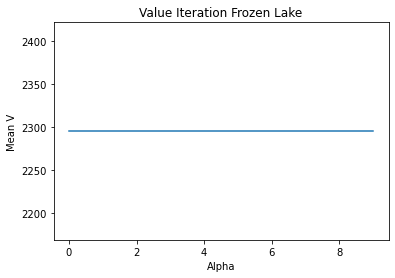

In [54]:
print('VI Min Epsilon')
size = [.1, .01, .001, .0001, .00001, .000001, .0000001, .00000001, .000000001, .0000000001]
rewards_vi = []
for s in size:
    value_iteration_forest = mdptoolbox.mdp.ValueIteration(transitions=transition_matrix,
                                        reward=rewards,
                                        gamma=.999, epsilon=s)
    value_iteration_forest_stats = value_iteration_forest.run()
    value_iteration_forest_policy = np.array(value_iteration_forest.policy)#.reshape(nrow, ncol)

#     plot_learning(policy_iteration_forest_stats, 'Forest PI', 'Policy Difference')

    plot_mean_v_learning(value_iteration_forest_stats, 'Frozen Lake VI','V')
    # plot_mean_v_learning(q_learning_forest_stats, 'Forest QLearning', 'V')

#     plot_learning(policy_iteration_forest_stats, 'Forest PI', 'Error')
    # plot_learning(q_learning_forest_stats, 'Forest QLearning', 'Error')

    plot_learning(value_iteration_forest_stats, 'Frozen Lake VI', 'Time')
    rewards_vi.append(value_iteration_forest_stats[-1]['Mean V'])
    # plot_learning(q_learning_forest_stats, 'Forest QLearning', 'Time')

    print("----------------------------------------")
    print()
    print()
    
plot_epsilon(rewards_vi, 'Value Iteration Frozen Lake')

VI Frozen Lake


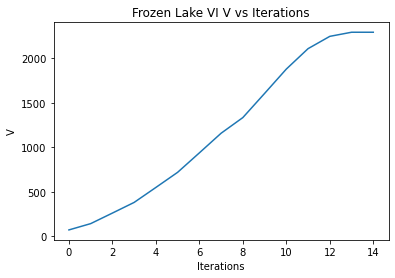

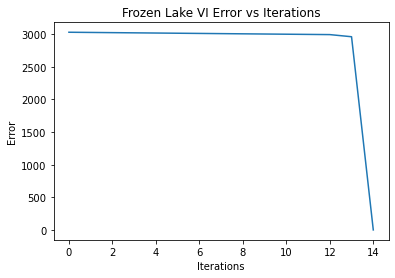

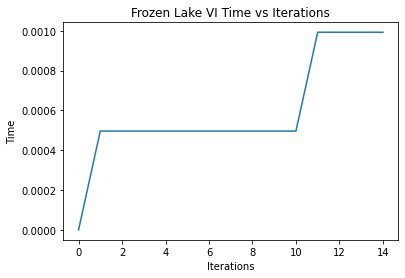

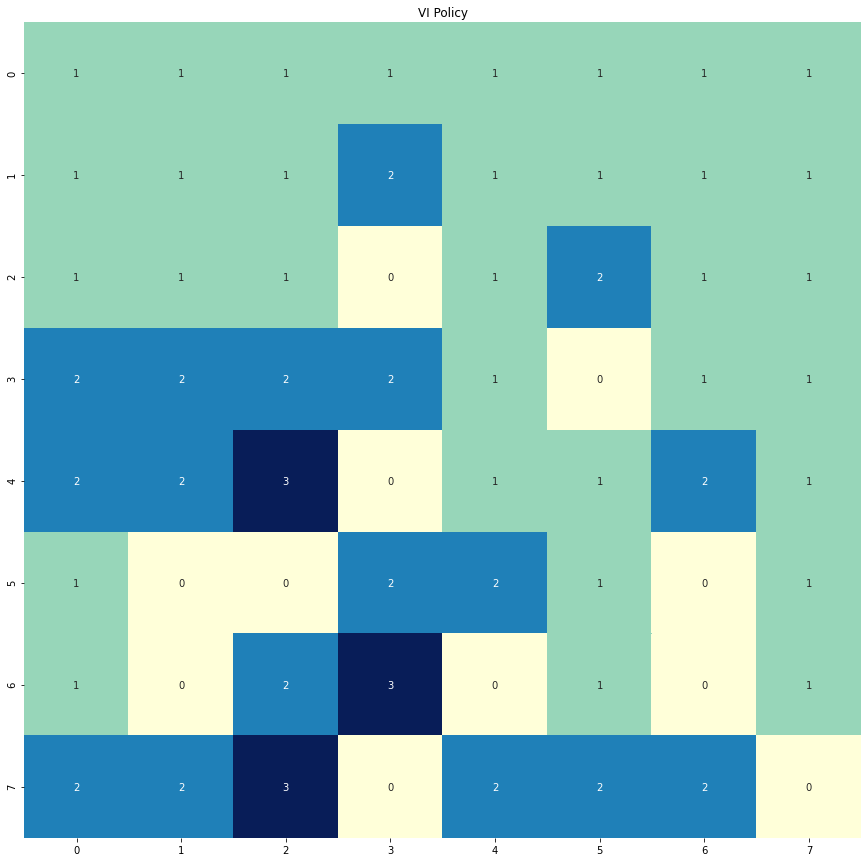

In [57]:
print("VI Frozen Lake")
value_iteration_forest = mdptoolbox.mdp.ValueIteration(transitions=transition_matrix,
                                    reward=rewards,
                                    gamma=.999)
value_iteration_forest_stats = value_iteration_forest.run()
value_iteration_forest_policy = np.array(value_iteration_forest.policy)#.reshape(nrow, ncol)

plot_mean_v_learning(value_iteration_forest_stats, 'Frozen Lake VI','V')
plot_learning(value_iteration_forest_stats, 'Frozen Lake VI', 'Error')
plot_learning(value_iteration_forest_stats, 'Frozen Lake VI', 'Time')


plot_matrix(np.array(value_iteration_forest.policy).reshape(8, 8), 'VI Policy')